In [1]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools
import pydotplus

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import seaborn as sns  #data visualization library
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold #Data split function

from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler, LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, roc_curve, auc,f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

#Decision tree plot
from IPython.display import Image

from collections import Counter


# Modelling
from sklearn.metrics import precision_score, recall_score
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# 1. Import Data

First, we load the data from a .csv file and store it in a Pandas data frame.

In [2]:
#Load the dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


# 2. Perform EDA on the Dataset:

## 2.1. Dataset overview

In [3]:
df.shape

(10000, 12)

The dataset has 10000 rows (entries/instances/observations) and 12 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  object 
 11  churn             10000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 937.6+ KB


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


In [6]:
df.loc[[2362]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2362,15791053,709,Germany,Male,45,4,122917.71,1,1,1,Nov-58,1


There is no null value in the dataset. However, the column **'estimated_salary'** is formatted as *'object'* datatype.

2.3. Convert **'estimated_salary'** column to numerical

In [7]:
df['estimated_salary'] = pd.to_numeric(df['estimated_salary'],errors='coerce')
df.dropna(inplace = True)
df["estimated_salary"]

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: estimated_salary, Length: 9999, dtype: float64

In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000
mean,1.569093e+07,650.522952,38.921192,5.012901,76481.245642,1.530253,0.705471,0.515052,100100.248748,0.20362
std,7.193282e+04,96.656363,10.488155,2.892301,62398.797596,0.581659,0.455854,0.499798,57504.658260,0.40271
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.00000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51013.655000,0.00000
50%,1.569073e+07,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,1.000000,100200.400000,0.00000
75%,1.575322e+07,718.000000,44.000000,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.00000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


Here we'll create a copy of the original dataset in order to use non-categorized data for predictive analysis. 

In [9]:
df_original = pd.DataFrame(df)
df_copy = df_original.copy()

## 2.2. Customer Churn Distribution

This plot shows the distribution of churn vs. non-churn customers. You can see the number of customers who have churned (left the bank service) and those who have not.

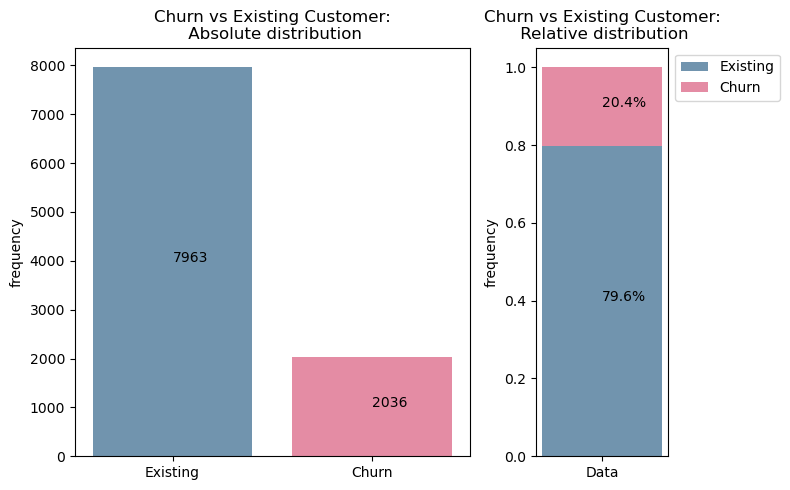

In [10]:
# plot Churn vs. Non-Churn 
keys, counts = np.unique(df['churn'], return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Existing', 'Churn'], counts, color=['#7194AE','#e48ca4']) #left bar plot
ax0 = plt.title('Churn vs Existing Customer:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['Existing'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['Churn'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Relative values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='Existing', color=["#7194AE"])
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='Churn', color=["#e48ca4"])
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Churn vs Existing Customer:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

The dataset shows an imbalance with 7,963 (79.6%) non-churned and 2,037 (20.4%) churned customers. Imbalanced data may necessitate special model training techniques, like oversampling or undersampling, to handle class imbalance effectively.

## 2.3. Numeric Feature Distribution:

These histograms show the distribution of numeric features (credit_score, age, tenure, balance, and estimated_salary) for the entire dataset.

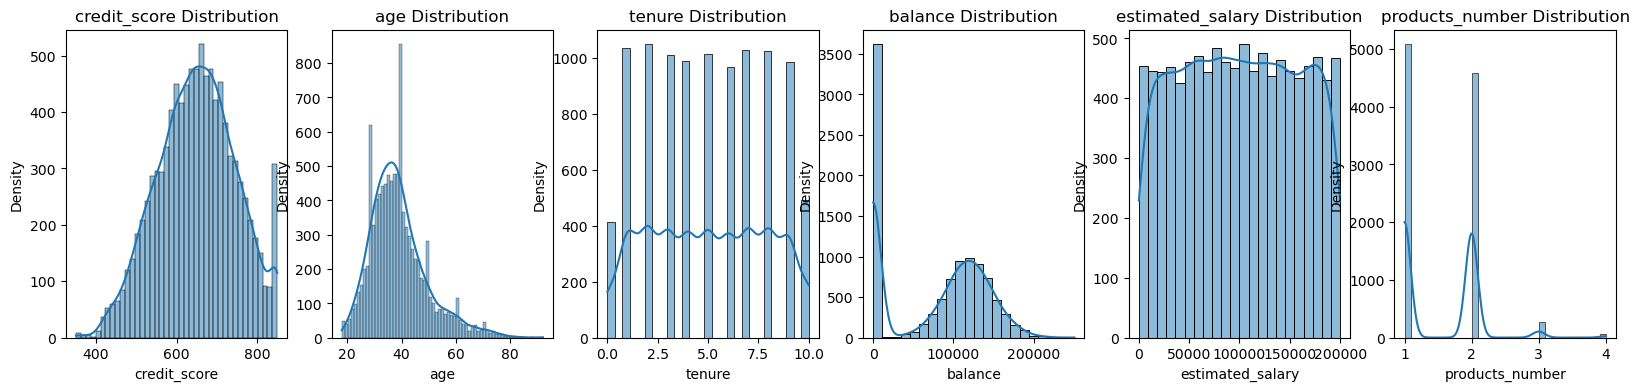

In [11]:
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'products_number']
plt.figure(figsize=(20, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 6, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')

We can observe how these numeric features are distributed. For instance, understanding the distribution of credit_score, balance, and age can help in bank strategy decisions (e.g. promotion or pricing strategies) to reduce the churn rate.

Age feature seemed to be skewed. This can be seen on the histogram, and it means that the variables are not evenly distributed. By making it logaritmic we avoid this problem.

## 2.4. Categorical Feature Distribution:

Categorize "estimated_salary", "age", "credit_score", "tenure"

In [12]:
#buckets Salary
salary_bins = [0, 50000, 100000, 150000, 200000, np.inf]  
salary_range = ['0-50K', '50K-100K', '100K-150K', '150K-200K', 'Above 200K']
df['salary_range'] = pd.cut(df['estimated_salary'], bins=salary_bins, labels=salary_range, right=False)

#buckets Age
age_bins = [0, 20, 30, 40, 50, np.inf]  
age_labels = ['0-20', '21-30', '31-40', '41-50', 'Above 50']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#buckets Credit Score
credit_bins = [0, 400, 600, 800, np.inf]  
credit_labels = ['0-400', '400-600', '600 - 800', 'Above 800']
df['cred_score_group'] = pd.cut(df['credit_score'], bins=credit_bins, labels=credit_labels, right=False)

#buckets Tenure
tenure_bins = [0, 2.5, 5, 7.5, 10, np.inf]  
tenure_labels = ['0 - 2.5 years', '2.5 - 5 years', '5 - 7.5 years', '7.5 - 10 years', 'Above 10 years']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

These plots show the distribution of categorical features (*country, gender, products_number, credit_card, active_member, salary_range, age_group, cred_score_group, tenure_group*) split by churn status.

These plots provide insights into how different categories of customers (e.g. *male vs. female, active vs. non-active, customers with credit card vs. without*) are distributed in terms of churn. 

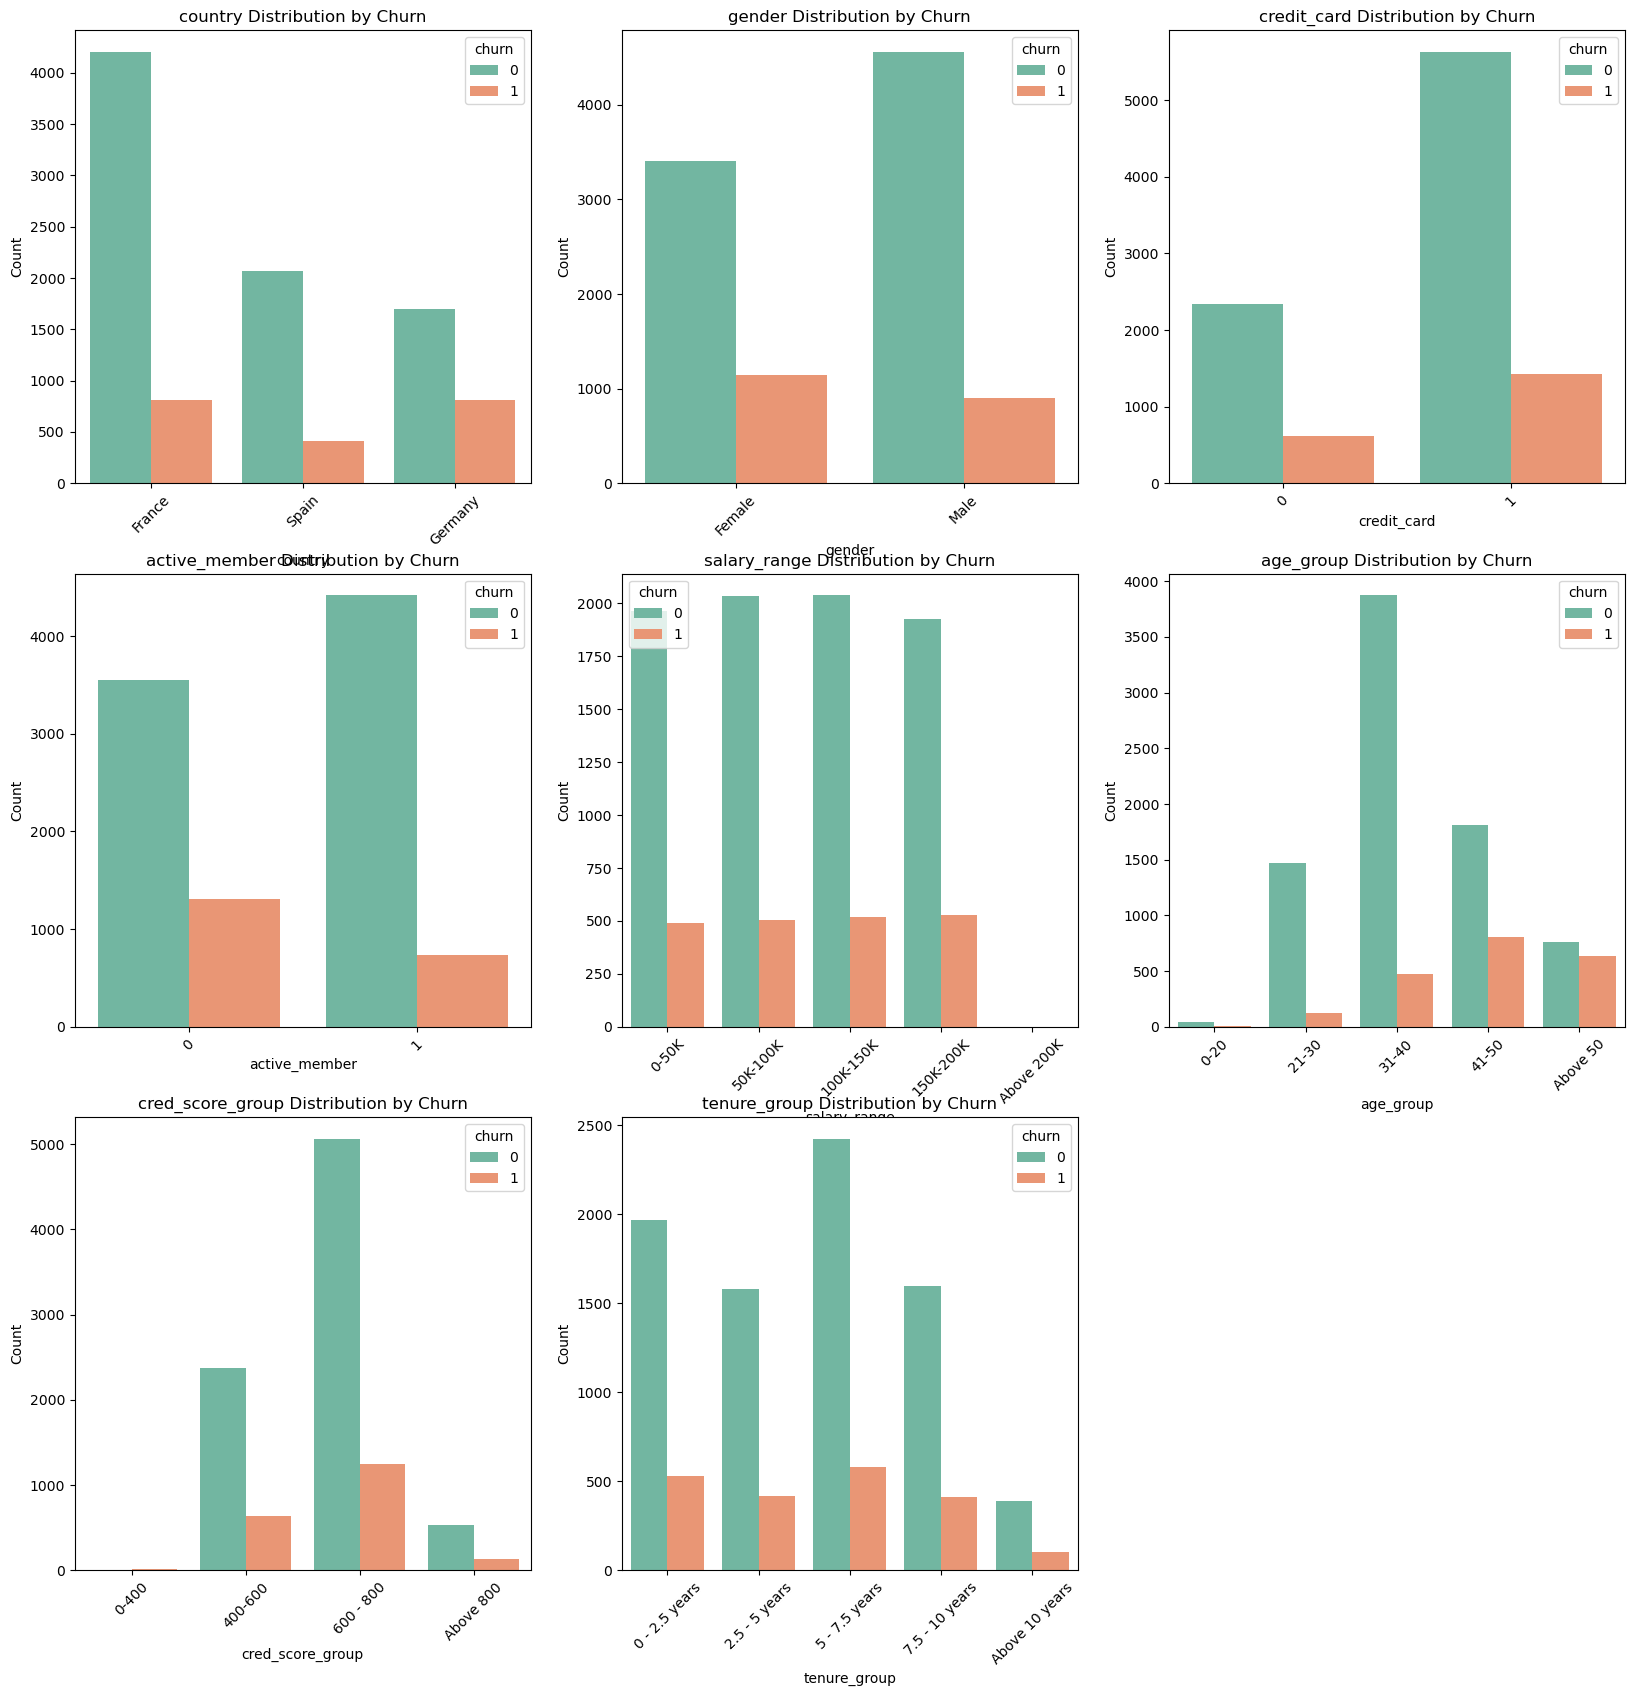

In [13]:
categorical_features = ['country', 'gender', 'credit_card', 'active_member', 'salary_range', 'age_group', 'cred_score_group', 'tenure_group']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, hue='churn', palette='Set2')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

We identify potential customer segments that are more likely to churn:
1. Customers from **Germany**
2. Customers who are **Female**
3. Customers using **Product 1**
4. Customers **using Credit Card**
5. Customers who are **Non-active members**
6. Customers who are **above 41 years old**
7. Customers having **credit scores ranging from below 400 to 800**

## 2.5. Correlation Heatmap:

The heatmap displays the correlation between numeric features in the dataset. Understanding feature correlations can help in feature selection. For instance, if *active_member* and *age* are highly correlated, we might choose to keep only one of them to avoid multicollinearity in our models. It also helps identify which features might be more important in predicting churn.

Text(0.5, 1.0, 'Correlation Heatmap')

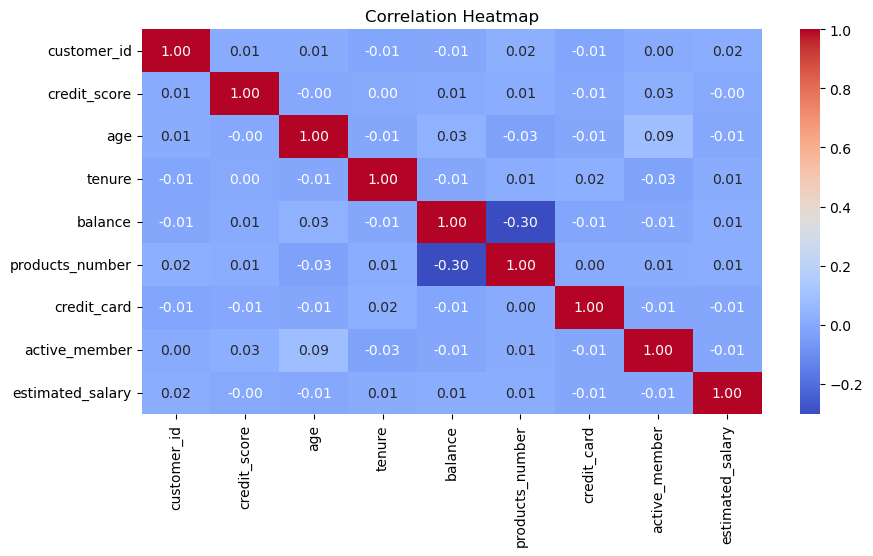

In [14]:
corr = df.select_dtypes("number").drop(columns="churn").corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

There are no strongly correlated features in our feature matrix. Thus, no columns need to be removed.

# 3. Preprocessing

## 3.1. Data wrangling

In [15]:
# Get dummies for the 'country' column
df_copy = pd.get_dummies(df_copy, columns=["country"])

# Transform categorical 'gender' with binary encoding
df_copy["gender"] = df_copy["gender"].replace({"Male" : 1, "Female" : 0})

# Drop customer id so it doesn't mess up the analysis
df_copy = df_copy.drop('customer_id', axis=1)

#logarithmic transformation to have the age data approximated to normal distribution
df_copy['age'] = np.log1p(df_copy.age)

# Show the result                         
df_copy.head().style

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,3.761200,2,0.000000,1,1,1,101348.880000,1,True,False,False
1,608,0,3.737670,1,83807.860000,1,0,1,112542.580000,0,False,False,True
2,502,0,3.761200,8,159660.800000,3,1,0,113931.570000,1,True,False,False
3,699,0,3.688879,1,0.000000,2,0,0,93826.630000,0,True,False,False
4,850,0,3.784190,2,125510.820000,1,1,1,79084.100000,0,False,False,True


In [16]:
df_copy.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000
mean,650.522952,0.545655,3.654684,5.012901,76481.245642,1.530253,0.705471,0.515052,100100.248748,0.20362
std,96.656363,0.497936,0.251658,2.892301,62398.797596,0.581659,0.455854,0.499798,57504.658260,0.40271
min,350.000000,0.000000,2.944439,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.00000
25%,584.000000,0.000000,3.496508,3.000000,0.000000,1.000000,0.000000,0.000000,51013.655000,0.00000
50%,652.000000,1.000000,3.637586,5.000000,97188.620000,1.000000,1.000000,1.000000,100200.400000,0.00000
75%,718.000000,1.000000,3.806662,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.00000
max,850.000000,1.000000,4.532599,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


## 3.2. Split data

We split the data 70:30 into a training (data_train) and a testing (data_test) partition. Furthermore, we split the dataset into a feature matrix X (all columns, except the target response column) and a label vector y (only the response column).


In [17]:
X = df_copy.drop(["churn"], axis=1)
y = df_copy["churn"]

In [18]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1234)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1234)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6999, 12), (6999,), (3000, 12), (3000,))

We visualize the split to ensure that the distribution of churn and non-churn cases matches the distribution in the full dataset.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


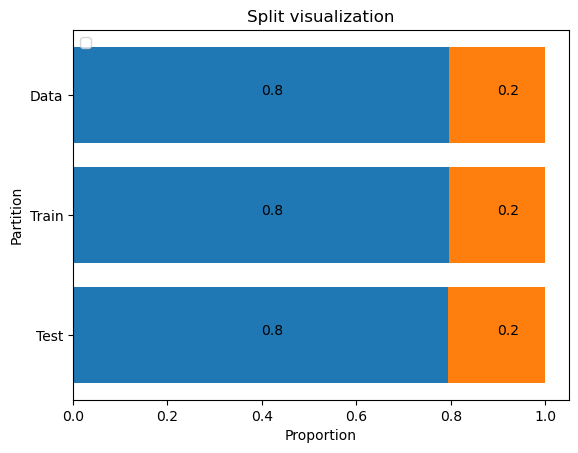

In [19]:
train_dist = y_train.value_counts() / len(y_train)
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]])
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]])
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

The distribution of "churn" and "non-churn" cases is seemingly equal to the distribution of the original, whole data set (there will always be a slight deviation). We conclude that the split was succesful and move on to building a model.

## 3.3. Rebalance the data with SMOTE

We only rebalance the training data! The true (real-life) distribution of "churn" to "non-churn" is imbalanced. The testing data has to capture the true distribution, thus it would be wrong to rebalance it. 

**SMOTE (Synthetic Minority Over-sampling Technique):**

**Basic Idea**: SMOTE also addresses class imbalance by increasing the number of minority class samples. However, it does so by generating synthetic samples that are similar to the existing minority class samples.

**How It Works**: SMOTE selects a minority class sample and its k-nearest neighbors in the feature space. It then creates synthetic samples by interpolating between the selected sample and its neighbors. These synthetic samples are added to the dataset.

**Effect**: SMOTE generates samples that are not exact duplicates but are interpolated versions of real samples, potentially introducing more diversity into the minority class.

In [20]:
smote = SMOTE(sampling_strategy='minority',random_state=1234)
X_sm, y_sm = smote.fit_resample(X_train, y_train) 

In [21]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

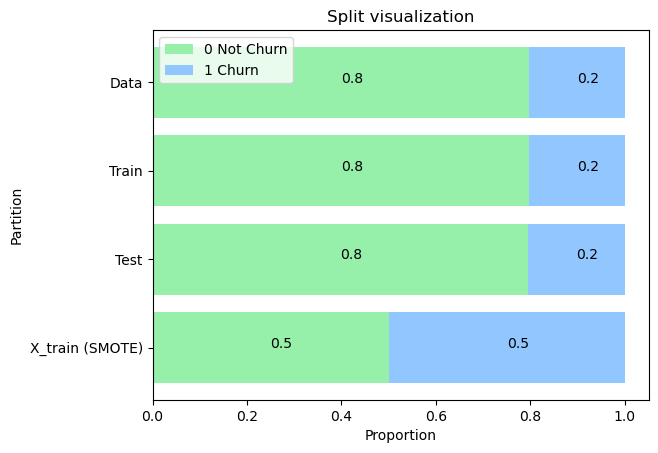

In [22]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#97F0AA', label='0 Not Churn')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#92C6FF', label='1 Churn')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

### Checking columns and shape before modeling

In [23]:
X_train.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain'],
      dtype='object')

In [24]:
X_train.shape

(6999, 12)

# 4. Modeling

## 4.1. LOGISTIC REGRESSION

### 4.1.1. Logistic Regression Original DataSet

In [25]:
#Initialize a logistic regresssion model and fit to the training data.
logreg_og = LogisticRegression(max_iter=20000, random_state=1234)

In [26]:
# fit the model with data
logreg_og.fit(X_train, y_train)
y_pred_logreg_og = logreg_og.predict(X_test)

In [27]:
# calculate accurary score 
accuracy_score(y_test,y_pred_logreg_og)

0.795

In [28]:
# Confusion matrix, in array format
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg_og)
cnf_matrix


array([[2385,    0],
       [ 615,    0]])

Text(0.5, 1.0, 'Logistic Regression original dataset (normalized)')

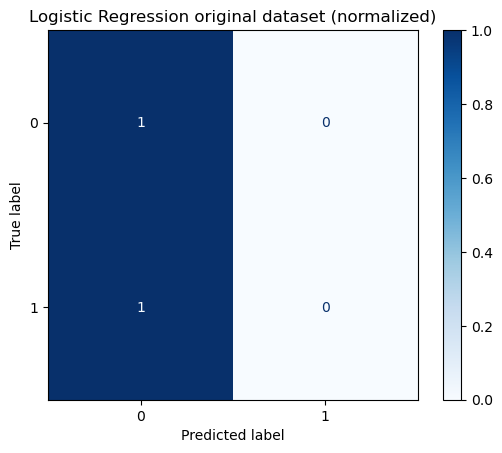

In [29]:
# Confusion matrix, in table format
ConfusionMatrixDisplay.from_estimator(logreg_og, X_test, y_test, cmap="Blues", normalize='true')
plt.title("Logistic Regression original dataset (normalized)")

In [30]:
# print classification_report
print(classification_report(y_test, y_pred_logreg_og))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2385
           1       0.00      0.00      0.00       615

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.70      3000



/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.1.2 Logistic Regression Balanced Dataset

In [31]:
#Initialize a logistic regresssion model and fit to the training data.
logreg_bl = LogisticRegression(max_iter=20000, random_state=1234)

In [32]:
# fit the model with data
logreg_bl.fit(X_sm, y_sm)
y_pred_logreg_bl = logreg_bl.predict(X_test)

In [33]:
# calculate accurary score 
accuracy_score(y_test,y_pred_logreg_bl)

0.5186666666666667

In [34]:
# Confusion matrix, in array format
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg_bl)
cnf_matrix


array([[1125, 1260],
       [ 184,  431]])

In [35]:
# print classification_report
print(classification_report(y_test, y_pred_logreg_bl))

              precision    recall  f1-score   support

           0       0.86      0.47      0.61      2385
           1       0.25      0.70      0.37       615

    accuracy                           0.52      3000
   macro avg       0.56      0.59      0.49      3000
weighted avg       0.74      0.52      0.56      3000



### 4.1.3 Compared result of Logistic Regression model in original dataset and balanced dataset

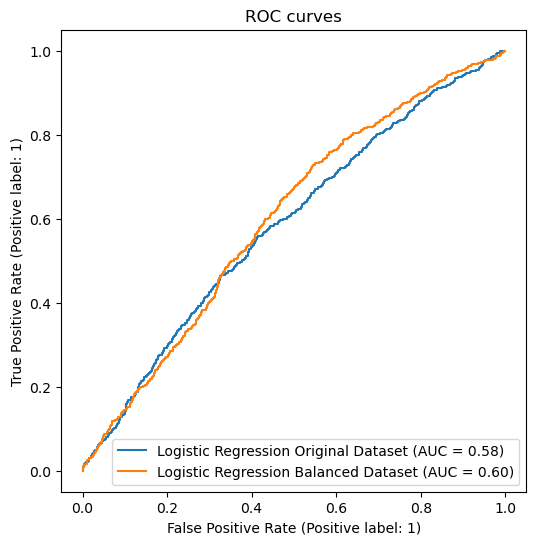

In [36]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("ROC curves")
RocCurveDisplay.from_estimator(logreg_og, X_test, y_test, ax=ax, name= "Logistic Regression Original Dataset")
RocCurveDisplay.from_estimator(logreg_bl, X_test, y_test, ax=ax, name= "Logistic Regression Balanced Dataset")

Balanced Dataset gets slightly better result.

### 4.1.4  Logistic regression with regularization

We apply logistic regression with regularization on original dataset

We scale the features using the training set so that every variable has mean 0 and standard deviation 1. 

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_lr_reg = scaler.transform(X_train)
X_test_lr_reg = scaler.transform(X_test)

We define a search grid for regularization parameters.

In [38]:
Cs = np.logspace(-4, 4) 
l1_ratios = np.linspace(0, 1)
logreg_bl_reg = LogisticRegressionCV(
    Cs=Cs, 
    penalty="elasticnet",
    solver="saga",
    max_iter=100000,
    l1_ratios=l1_ratios,
    cv=5,
    n_jobs=-1
)
logreg_bl_reg.fit(X_train_lr_reg, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68...
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                     max_iter=100000, n_jobs=-1, penalty='elasticnet',
                     solver='saga')

We can view the hyperparameters found in the optimization.

In [39]:
# C is the inverse reg penalty, i.e. small value c means larger penalty. 
logreg_bl_reg.C_

array([0.02811769])

In [40]:
# l1_ratios determines the ration between L1 and L2 penalties. 0 = L2 penalty (as  in Rigde) and 1 = L1 penalty (as in Lasso)
logreg_bl_reg.l1_ratio_

array([0.79591837])

Our model is closer to L1-penalty. There are 4 coefficients that set to 0.

In [41]:
logreg_bl_reg.coef_

array([[-0.03182777, -0.2507334 ,  0.83836561, -0.00200442,  0.08949959,
        -0.05590907,  0.        , -0.49553983,  0.        ,  0.        ,
         0.32098982,  0.        ]])

We evaluate the final model using the test set.

In [42]:
y_pred_lr_rg = logreg_bl_reg.predict(X_test_lr_reg)
accuracy_score(y_test, y_pred_lr_rg)

0.8123333333333334

Text(0.5, 1.0, 'Logistic Regression with regularization in original dataset (normalized)')

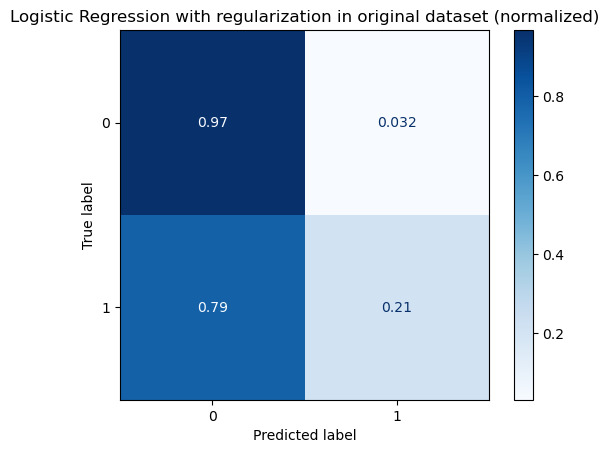

In [43]:
ConfusionMatrixDisplay.from_estimator(logreg_bl_reg, X_test_lr_reg, y_test, cmap="Blues", normalize='true')
plt.title("Logistic Regression with regularization in original dataset (normalized)")

In [44]:
# print classification_report
print(classification_report(y_test,y_pred_lr_rg))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2385
           1       0.63      0.21      0.31       615

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.81      0.77      3000



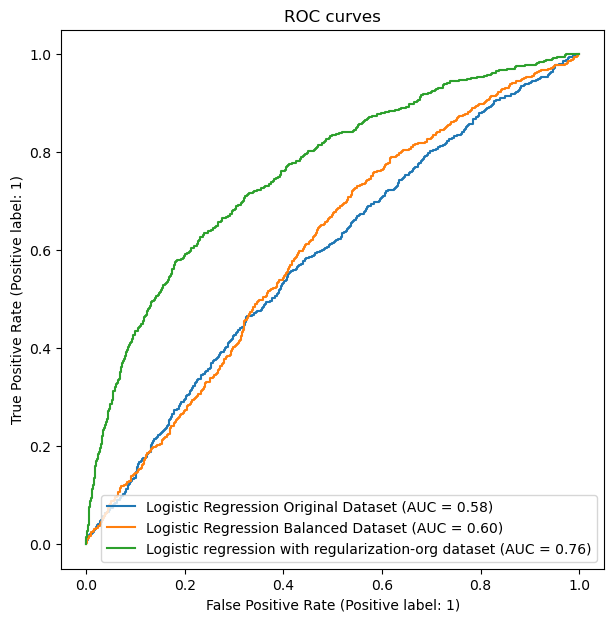

In [45]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("ROC curves")
RocCurveDisplay.from_estimator(logreg_og, X_test, y_test, ax=ax, name= "Logistic Regression Original Dataset")
RocCurveDisplay.from_estimator(logreg_bl, X_test, y_test, ax=ax, name= "Logistic Regression Balanced Dataset")
RocCurveDisplay.from_estimator(logreg_bl_reg, X_test_lr_reg, y_test, ax=ax, name="Logistic regression with regularization-org dataset")

## 4.1. Random Forest MIRA

### 4.3.1 Default model with default data

### Building and fitting model

In [46]:
rf_og = RandomForestClassifier(
    max_depth=4, 
    min_samples_leaf=3, 
    random_state=1234)
rf_og.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=1234)

### Checking prediction scores

In [47]:
y_pred_rf_og = rf_og.predict(X_test)
y_predProba_rf_og = rf_og.predict_proba(X_test)
y_predProba_rf_og[:,[1]]

array([[0.14343396],
       [0.11231657],
       [0.12405332],
       ...,
       [0.12749651],
       [0.08877527],
       [0.11775289]])

### Visualization / RandomForest first three DecisionTrees

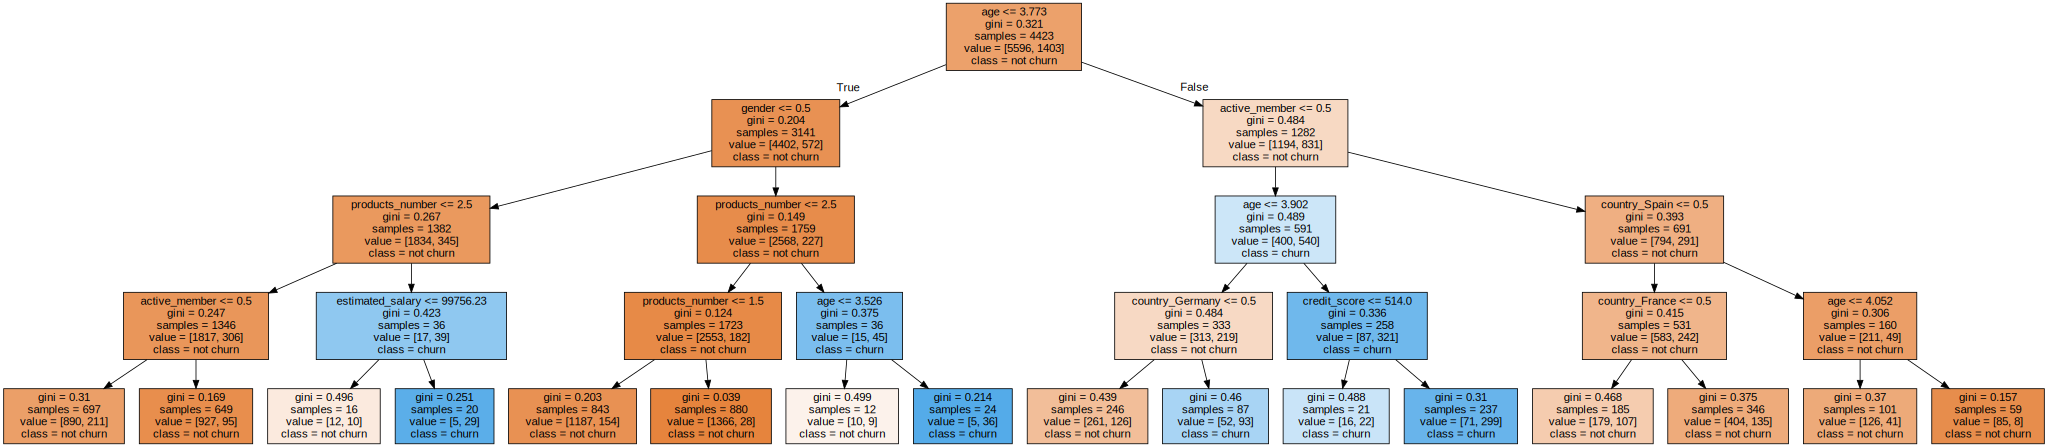

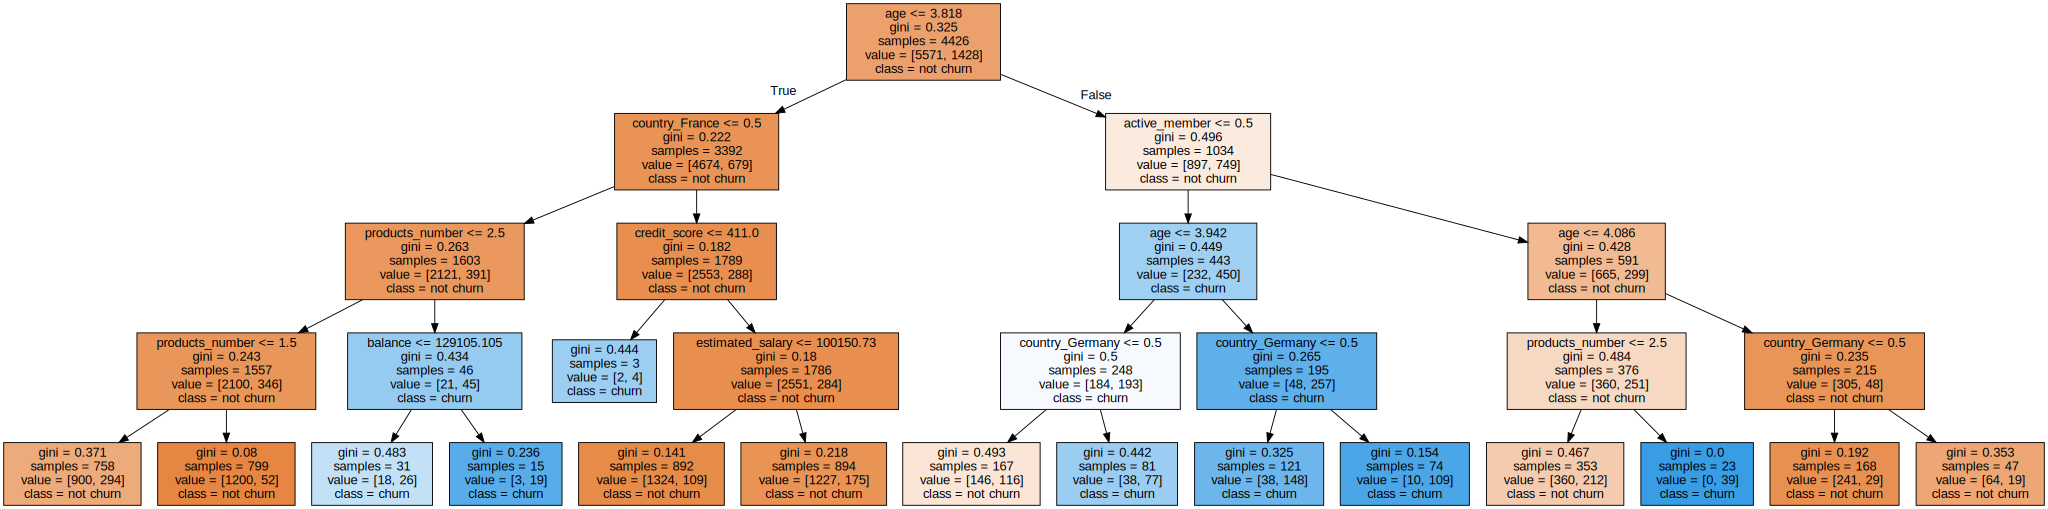

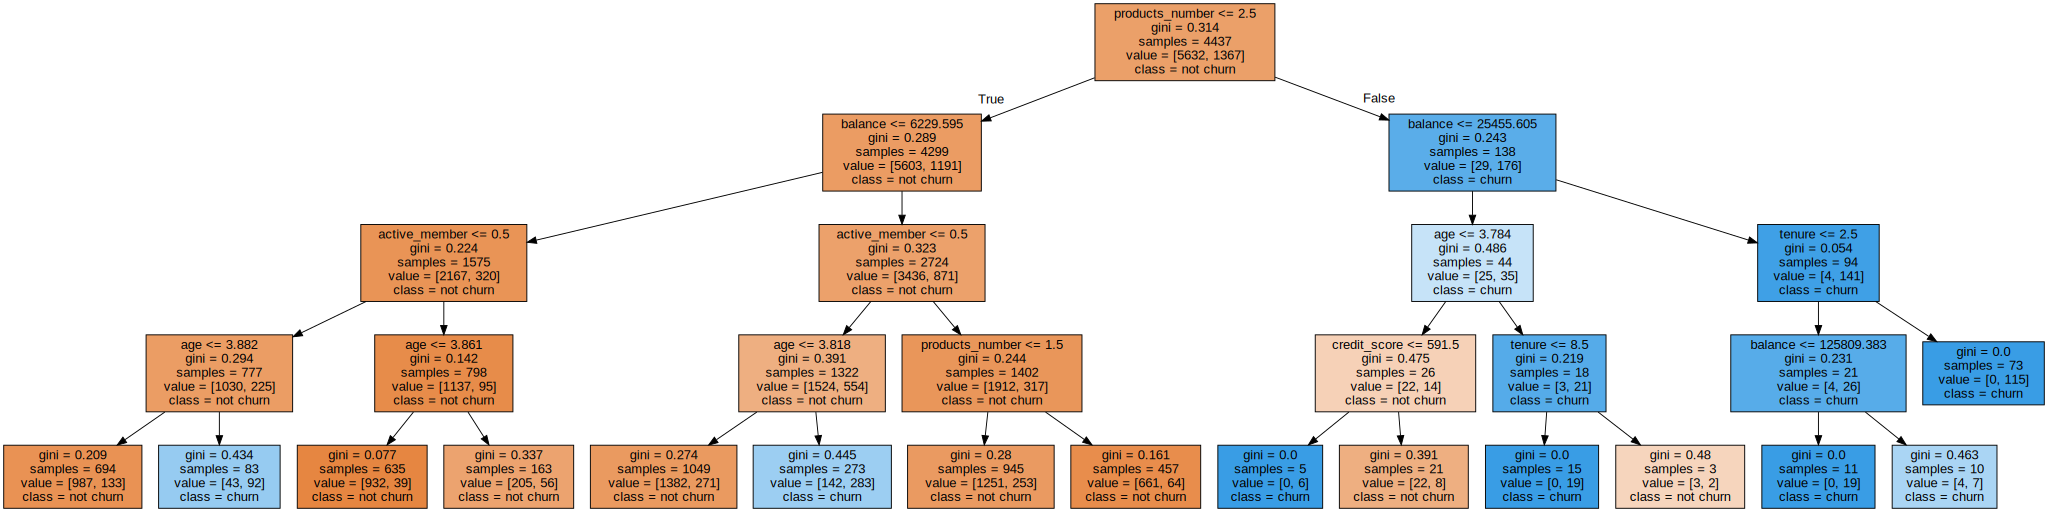

In [48]:
# Export the first three decision trees from the forest
import os

#TULOSTUS
output_dir = 'RF_decision_trees'
os.makedirs(output_dir, exist_ok=True)

for i in range(3):
    rf_tree = rf_og.estimators_[i]
    dot_data = tree.export_graphviz(rf_tree,
                               feature_names=X_train.columns,
                               class_names=["not churn", "churn"],
                               filled=True,
                               max_depth=4,
                               impurity=True) 
    graph = graphviz.Source(dot_data)
    display(graph)
    
    # Save the decision tree as a PNG file
    tree_filename = os.path.join(output_dir, f'decision_tree_{i}.png')
    graph.render(tree_filename)

### ConfusionMatrix

Text(0.5, 1.0, 'Default RandomForest - Default data: Absolute distribution')

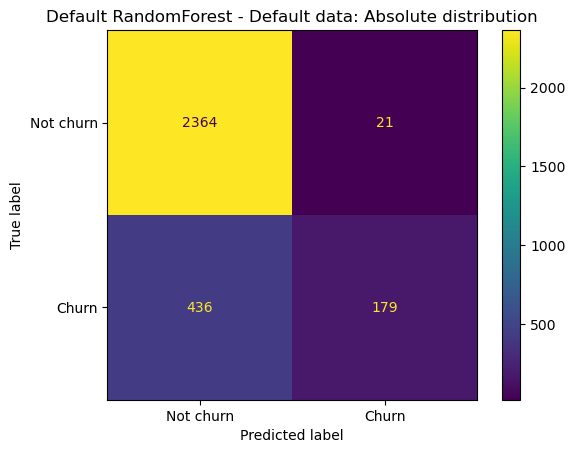

In [49]:
#ConfusionMatrix - Absolute distribution
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_og, display_labels=["Not churn", "Churn"])
plt.title("Default RandomForest - Default data: Absolute distribution")

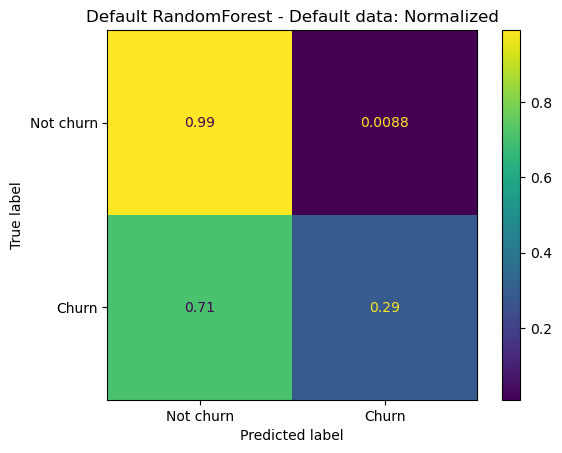

In [50]:
# ConfusionMatrix -  Normalized
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_og, normalize="true", display_labels=["Not churn", "Churn"])
plt.title("Default RandomForest - Default data: Normalized")
plt.show()

### Classification Report

In [51]:
print('\n\033[1m','Default RandomForest - Default data')
print('\033[0m', classification_report(y_test, y_pred_rf_og))


 Default RandomForest - Default data
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2385
           1       0.90      0.29      0.44       615

    accuracy                           0.85      3000
   macro avg       0.87      0.64      0.68      3000
weighted avg       0.85      0.85      0.81      3000



### Relative feature importances

In [52]:
importances = rf_og.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
feature_order = feature_order[:,indices]

# Print the feature ranking
print("Default RandomForest - Default data: Feature ranking")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Default RandomForest - Default data: Feature ranking
1. feature 2 (0.424772)
2. feature 5 (0.316995)
3. feature 7 (0.098444)
4. feature 10 (0.058950)
5. feature 4 (0.040781)
6. feature 1 (0.022641)
7. feature 0 (0.014608)
8. feature 9 (0.008716)
9. feature 8 (0.006434)
10. feature 11 (0.004571)
11. feature 3 (0.002405)
12. feature 6 (0.000683)


In [53]:
importances[indices]

array([0.42477219, 0.31699485, 0.09844398, 0.05894958, 0.04078125,
       0.02264064, 0.01460809, 0.00871553, 0.00643436, 0.00457135,
       0.00240485, 0.00068333])

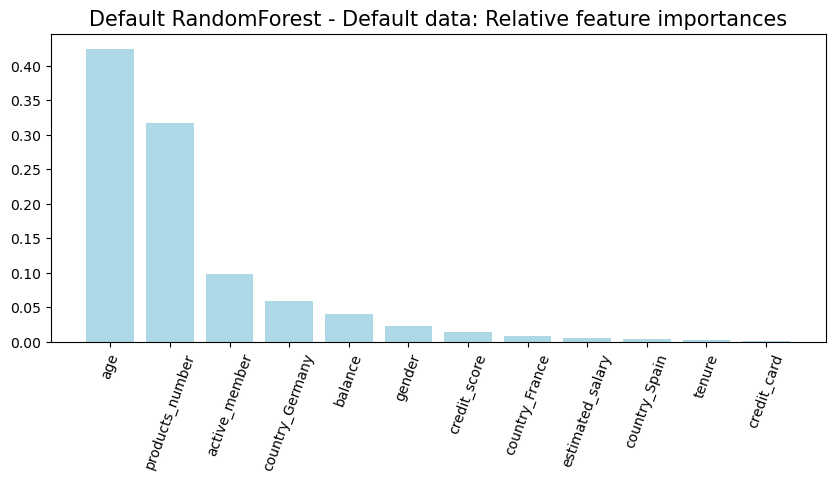

In [54]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 4))
plt.title("Default RandomForest - Default data: Relative feature importances",fontsize=15)
plt.bar(range(X.shape[1]), importances[indices],
       color="lightblue",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=70)
plt.xlim([-1, X.shape[1]])
plt.savefig("Relative_Imp_1.pdf", format="pdf", bbox_inches="tight")
plt.show()


### ROC Curve and AUC score

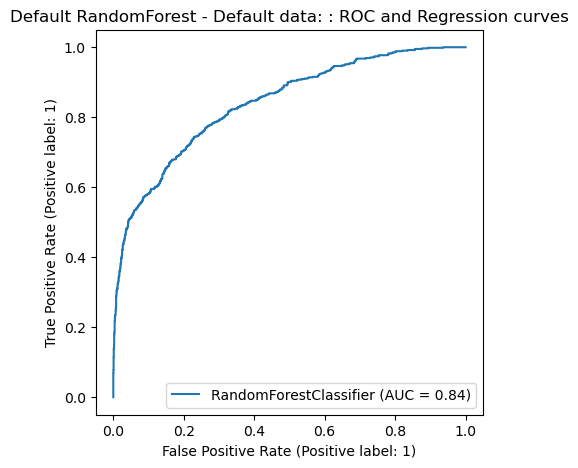

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Default RandomForest - Default data: : ROC and Regression curves")
RocCurveDisplay.from_estimator(rf_og, X_test, y_test,ax=ax)

### 4.3.2 Optimized model with default data

### Building and fitting model

In [56]:
param_dist = {'n_estimators': [100, 200, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750],
              'criterion':['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_leaf': [1, 3, 10, 15, 20, 25, 30, 35],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'random_state': [1234]
             }

# Create a random forest classifier
rf_hp = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_rf_hp = RandomizedSearchCV(rf_hp,
                                param_distributions = param_dist, 
                                n_iter=50,
                                cv=fold,
                                refit=True, 
                                n_jobs=-1,
                                verbose=2,
                                return_train_score = True,
                                random_state=1234)


In [57]:
# Fit the random search object to the data
rand_rf_hp.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=30, n_estimators=550, random_state=1234; total time=   8.6s
[CV] END criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, n_estimators=350, random_state=1234; total time=   6.6s
[CV] END criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, n_estimators=350, random_state=1234; total time=   7.0s
[CV] END criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=35, n_estimators=200, random_state=1234; total time=   2.1s
[CV] END criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=3, n_estimators=600, random_state=1234; total time=  11.3s
[CV] END criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=3, n_estimators=600, random_state=1234; total time=  11.4s
[CV] END criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=20, n_estimators=650, random_state=1234; total time=  

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12],
                                        'min_samples_leaf': [1, 3, 10, 15, 20,
                                                             25, 30, 35],
                                        'n_estimators': [100, 200, 300, 350,
                                                         400, 450, 500, 550,
                                                         600, 650, 700, 750],
                                        'random_state': [1234]},
                   random_state=1234, return_train_score=True, verbose=2)

### Best Parameters and Best Model

In [58]:
# Print the best hyperparameters
print('\033[1m', '\n Best hyperparameters:', rand_rf_hp.best_params_, '\n')

# Print the best index
print('\033[1m', 'Best index:', rand_rf_hp.best_index_, '\n')

# Print the best score
print('\033[1m', 'Best score:', round((rand_rf_hp.best_score_),2), '\n')

 
 Best hyperparameters: {'random_state': 1234, 'n_estimators': 400, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'criterion': 'gini'} 

 Best index: 39 

 Best score: 0.86 



In [59]:
# Create a variable for the best model
best_rf_hp = rand_rf_hp.best_estimator_

### Confusion Matrix

Text(0.5, 1.0, 'Optimized RandomForest - Default data: Normalized')

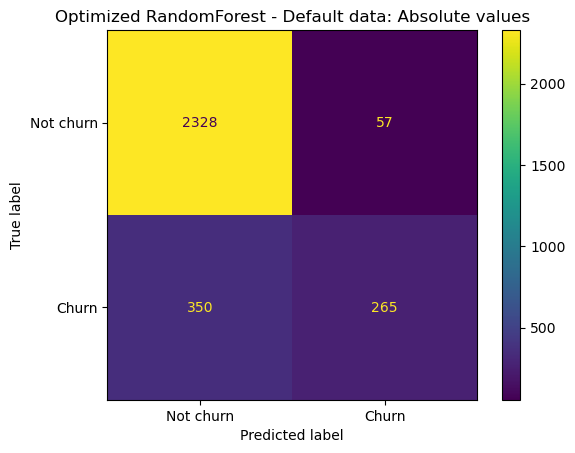

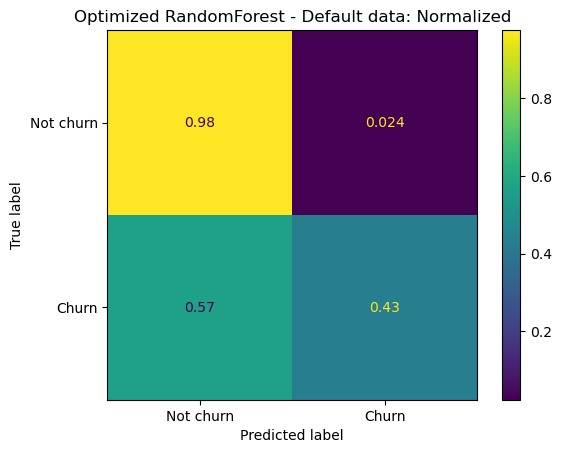

In [60]:
# Generate predictions with the best model
y_pred_rf_hp = best_rf_hp.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_hp)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not churn", "Churn"]).plot();
plt.title("Optimized RandomForest - Default data: Absolute values")

# Confusion matrix normalized
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_hp, normalize="true", display_labels=["Not churn", "Churn"])
plt.title("Optimized RandomForest - Default data: Normalized")


### Classification Reports

In [61]:
print('\n\033[1m','Default RandomForest - Default data')
print('\033[0m', classification_report(y_test, y_pred_rf_og))
print('\n\033[1m','Optimized RandomForest - Default data')
print('\033[0m', classification_report(y_test, y_pred_rf_hp))


 Default RandomForest - Default data
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2385
           1       0.90      0.29      0.44       615

    accuracy                           0.85      3000
   macro avg       0.87      0.64      0.68      3000
weighted avg       0.85      0.85      0.81      3000


 Optimized RandomForest - Default data
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2385
           1       0.82      0.43      0.57       615

    accuracy                           0.86      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.86      0.85      3000



### Relative feature importances

In [62]:
importances_rf_hp = best_rf_hp.feature_importances_
indices_rf_hp = np.argsort(importances_rf_hp)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances_rf_hp)[::-1]
feature_order = feature_order[:,i]
# Print the feature ranking
print("Optimized RandomForest - Default data: Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf_hp[f], importances_rf_hp[indices[f]]))
    

Optimized RandomForest - Default data: Feature ranking:
1. feature 2 (0.330901)
2. feature 5 (0.212867)
3. feature 4 (0.069081)
4. feature 0 (0.037386)
5. feature 8 (0.103486)
6. feature 7 (0.021797)
7. feature 3 (0.077371)
8. feature 10 (0.011847)
9. feature 1 (0.075907)
10. feature 9 (0.008426)
11. feature 6 (0.041293)
12. feature 11 (0.009638)


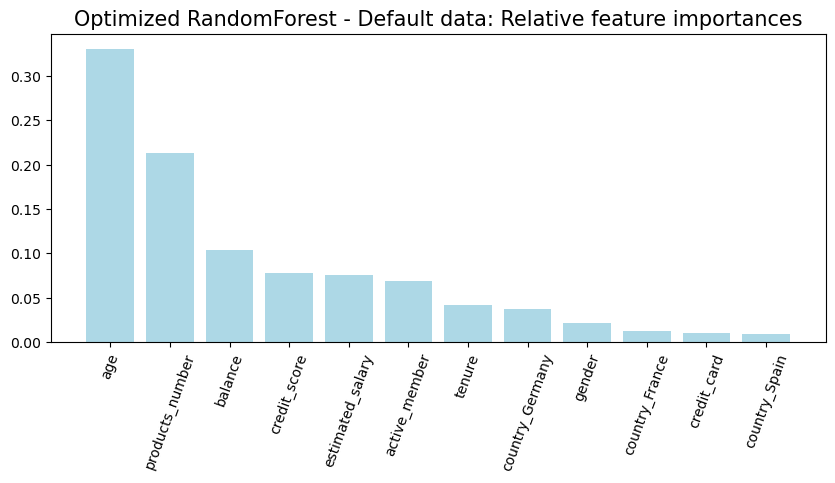

In [63]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 4))
plt.title("Optimized RandomForest - Default data: Relative feature importances",fontsize=15)
plt.bar(range(X.shape[1]), importances_rf_hp[indices_rf_hp],
       color="lightblue",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=70)
plt.xlim([-1, X.shape[1]])
plt.savefig("Relative_Imp_2.pdf", format="pdf", bbox_inches="tight")
plt.show()


### ROC curve and AUC score: Default vs. Optimized

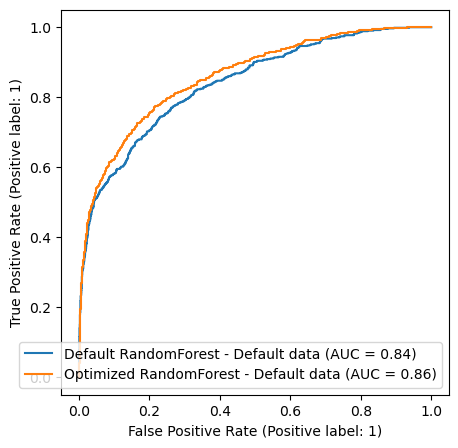

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
RocCurveDisplay.from_estimator(rf_og, X_test, y_test,ax=ax, name="Default RandomForest - Default data")
RocCurveDisplay.from_estimator(best_rf_hp, X_test, y_test,ax=ax, name="Optimized RandomForest - Default data") 


### ROC curve and AUC score: Train vs. Test

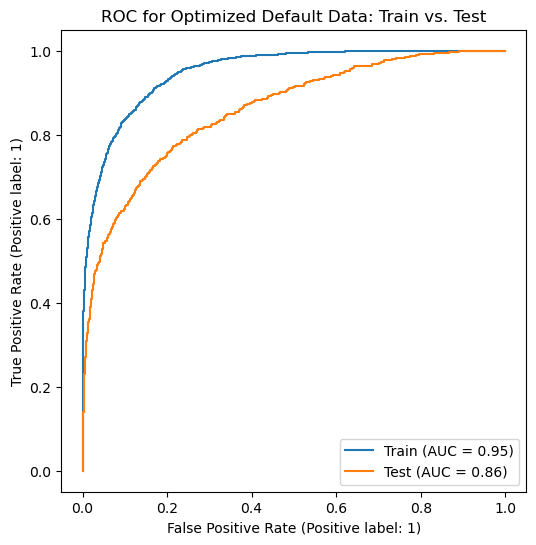

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC for Optimized Default Data: Train vs. Test")
RocCurveDisplay.from_estimator(best_rf_hp, X_train, y_train,ax=plt.gca(), name="Train")
RocCurveDisplay.from_estimator(best_rf_hp, X_test, y_test,ax=plt.gca(), name="Test")

### 4.3.3 Default model with Rebalanced data - SMOTE

In [66]:
rf_rb = RandomForestClassifier(max_depth=4,random_state=1234)
rf_rb.fit(X_sm,y_sm)

RandomForestClassifier(max_depth=4, random_state=1234)

In [67]:
y_pred_rf_rb = rf_rb.predict(X_test)
y_predProba_rf_rb = rf_rb.predict_proba(X_test)
y_predProba_rf_rb[:,[1]]

array([[0.36072676],
       [0.20600279],
       [0.24068407],
       ...,
       [0.34132498],
       [0.15911109],
       [0.17694387]])

Text(0.5, 1.0, 'Default RandomForest - Rebalanced data: Absolute distribution')

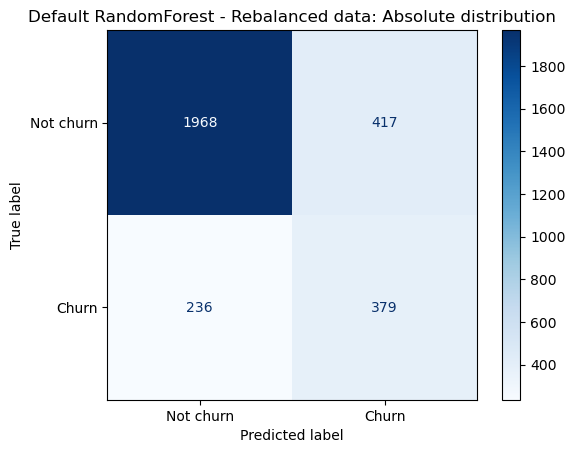

In [68]:
#ConfusionMatrix - Absolute distribution
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_rb, cmap="Blues", display_labels=["Not churn", "Churn"])
plt.title("Default RandomForest - Rebalanced data: Absolute distribution")

Text(0.5, 1.0, 'Default RandomForest - Rebalanced data: Normalized')

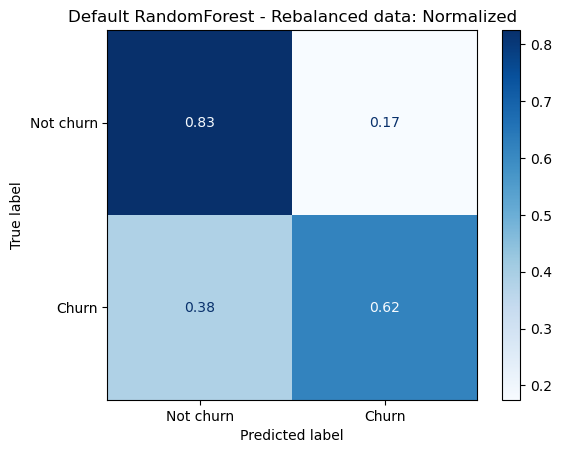

In [69]:
# ConfusionMatrix -  Normalized
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_rb, cmap="Blues", normalize="true", display_labels=["Not churn", "Churn"])
plt.title("Default RandomForest - Rebalanced data: Normalized")

### Classification Report

In [70]:
print('\n\033[1m','Default RandomForest - Rebalanced data:')
print('\033[0m', classification_report(y_test, y_pred_rf_rb)) 


 Default RandomForest - Rebalanced data:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2385
           1       0.48      0.62      0.54       615

    accuracy                           0.78      3000
   macro avg       0.68      0.72      0.70      3000
weighted avg       0.81      0.78      0.79      3000



### Relative feature importances

In [71]:
importances = rf_rb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
# Print the feature ranking
print("Default RandomForest - Rebalanced data: Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    

Default RandomForest - Rebalanced data: Feature ranking:
1. feature 2 (0.337504)
2. feature 7 (0.188320)
3. feature 5 (0.153425)
4. feature 1 (0.151733)
5. feature 10 (0.094381)
6. feature 4 (0.019719)
7. feature 6 (0.017624)
8. feature 9 (0.017013)
9. feature 3 (0.007649)
10. feature 11 (0.007554)
11. feature 0 (0.003206)
12. feature 8 (0.001871)


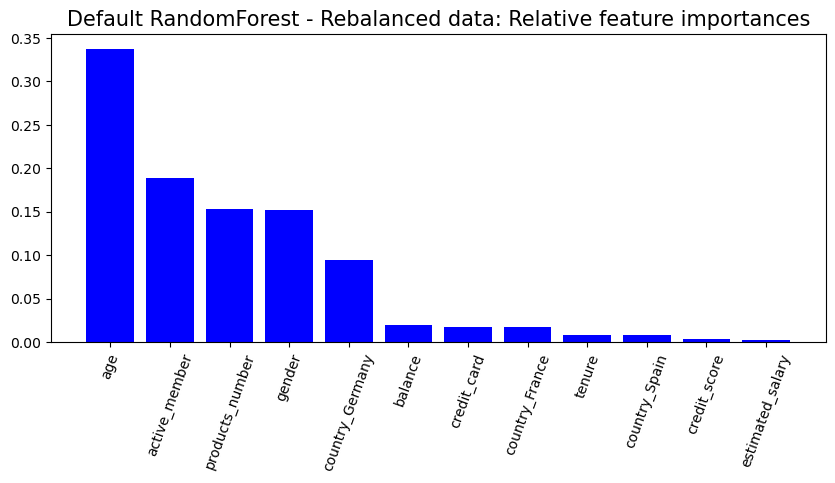

In [72]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 4))
plt.title("Default RandomForest - Rebalanced data: Relative feature importances",fontsize=15)
plt.bar(range(X.shape[1]), importances[indices],
       color="blue",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=70)
plt.xlim([-1, X.shape[1]])
plt.savefig("Relative_Imp_3.pdf", format="pdf", bbox_inches="tight")
plt.show()

### ROC curve and AUC score

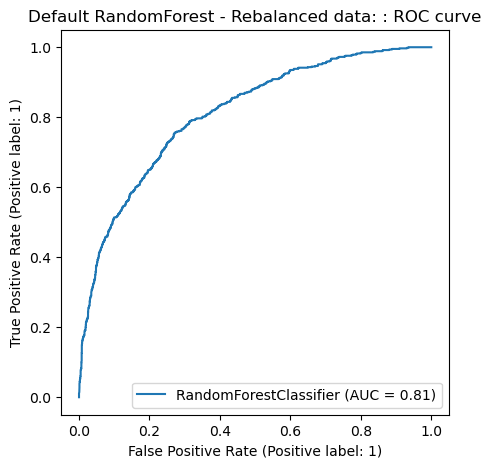

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Default RandomForest - Rebalanced data: : ROC curve")
RocCurveDisplay.from_estimator(rf_rb, X_test, y_test,ax=ax)

### 4.3.4 Optimized model with Rebalanced data - SMOTE

### Building and fitting model

In [74]:
param_dist = {'n_estimators': [100, 200, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750],
              'criterion':['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_leaf': [1, 3, 10, 15, 20, 25, 30, 35],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'random_state': [1234]
             }

# Create a random forest classifier
rf_rb_hp = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_rf_rb_hp = RandomizedSearchCV(rf_rb_hp,
                                param_distributions = param_dist, 
                                n_iter=50,
                                cv=fold,
                                refit=True, 
                                n_jobs=-1,
                                verbose=2,
                                return_train_score = True,
                                random_state=1234)


In [75]:
# Fit the random search object to the data
rand_rf_rb_hp.fit(X_sm, y_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=30, n_estimators=550, random_state=1234; total time=   8.5s
[CV] END criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=30, n_estimators=550, random_state=1234; total time=   8.5s
[CV] END criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, n_estimators=700, random_state=1234; total time=   2.2s
[CV] END criterion=gini, max_depth=2, max_features=2, min_samples_leaf=25, n_estimators=700, random_state=1234; total time=   2.2s
[CV] END criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=35, n_estimators=200, random_state=1234; total time=   2.2s
[CV] END criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=35, n_estimators=200, random_state=1234; total time=   2.2s
[CV] END criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=3, n_estimators=600, random_state=1234; total time=  11.4s
[C

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12],
                                        'min_samples_leaf': [1, 3, 10, 15, 20,
                                                             25, 30, 35],
                                        'n_estimators': [100, 200, 300, 350,
                                                         400, 450, 500, 550,
                                                         600, 650, 700, 750],
                                        'random_state': [1234]},
                   random_state=1234, return_train_score=True, verbose=2)

### Best hyperparameters and Best model

In [76]:
# Print the best hyperparameters
print('\033[1m', '\n Best hyperparameters:', rand_rf_rb_hp.best_params_, '\n')

# Print the best index
print('\033[1m', 'Best index:', rand_rf_rb_hp.best_index_, '\n')

# Print the best score
print('\033[1m', 'Best score:', round((rand_rf_rb_hp.best_score_),2), '\n')

 
 Best hyperparameters: {'random_state': 1234, 'n_estimators': 750, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 11, 'criterion': 'gini'} 

 Best index: 38 

 Best score: 0.87 



In [77]:
# Create a variable for the best model
best_rf_rb_hp = rand_rf_rb_hp.best_estimator_

### ConfusionMatrix

Text(0.5, 1.0, 'Optimized RandomForest - Rebalanced data: Normalized')

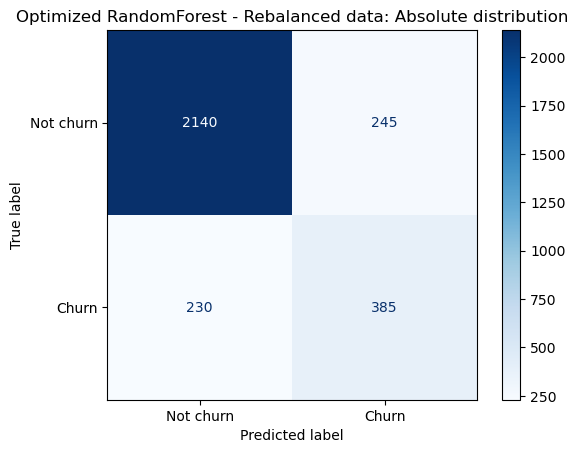

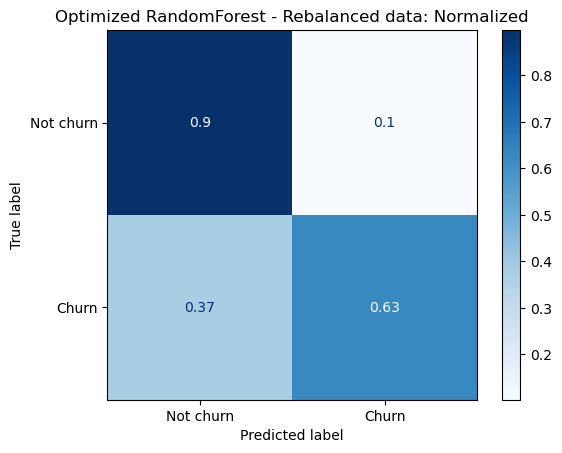

In [78]:
# Generate predictions with the best model
y_pred_rf_rb_hp = best_rf_rb_hp.predict(X_test)

#ConfusionMatrix - Absolute distribution
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_rb_hp, cmap="Blues", display_labels=["Not churn", "Churn"])
plt.title("Optimized RandomForest - Rebalanced data: Absolute distribution")

# Confusion matrix normalized
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_rb_hp, cmap="Blues", normalize="true", display_labels=["Not churn", "Churn"])
plt.title("Optimized RandomForest - Rebalanced data: Normalized")


### Classification reports

In [79]:
print('\n\033[1m','Default RandomForest - Rebalanced data:')
print('\033[0m', classification_report(y_test, y_pred_rf_rb))
print('\n\033[1m','Optimized RandomForest - Rebalanced data:')
print('\033[0m', classification_report(y_test, y_pred_rf_rb_hp))


 Default RandomForest - Rebalanced data:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2385
           1       0.48      0.62      0.54       615

    accuracy                           0.78      3000
   macro avg       0.68      0.72      0.70      3000
weighted avg       0.81      0.78      0.79      3000


 Optimized RandomForest - Rebalanced data:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2385
           1       0.61      0.63      0.62       615

    accuracy                           0.84      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.84      0.84      0.84      3000



### Relative feature importamces

In [80]:
importances_rf_rb_hp = best_rf_rb_hp.feature_importances_
indices_rf_rb_hp = np.argsort(importances_rf_rb_hp)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances_rf_rb_hp)[::-1]
feature_order = feature_order[:,i]
# Print the feature ranking
print("Optimized RandomForest - Rebalanced data: Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf_rb_hp[f], importances_rf_rb_hp[indices[f]]))
    

Optimized RandomForest - Rebalanced data: Feature ranking:
1. feature 2 (0.306010)
2. feature 7 (0.132974)
3. feature 5 (0.104992)
4. feature 4 (0.080328)
5. feature 1 (0.053497)
6. feature 8 (0.100346)
7. feature 0 (0.010878)
8. feature 10 (0.035325)
9. feature 9 (0.033983)
10. feature 3 (0.022340)
11. feature 11 (0.056710)
12. feature 6 (0.062617)


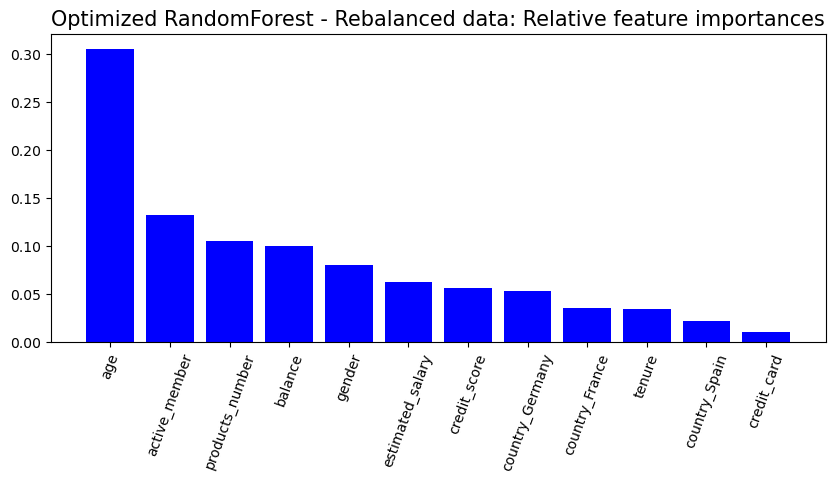

In [81]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 4))
plt.title("Optimized RandomForest - Rebalanced data: Relative feature importances",fontsize=15)
plt.bar(range(X.shape[1]), importances_rf_rb_hp[indices_rf_rb_hp],
       color="blue",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=70)
plt.xlim([-1, X.shape[1]])
plt.savefig("Relative_Imp_4.pdf", format="pdf", bbox_inches="tight")
plt.show()

### ROC curve and AUC score: Default vs. Optimized

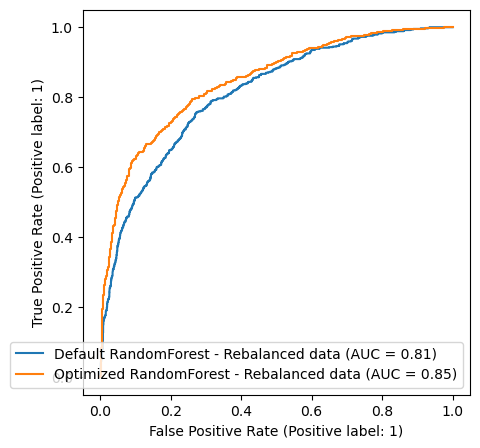

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
RocCurveDisplay.from_estimator(rf_rb, X_test, y_test,ax=ax, name="Default RandomForest - Rebalanced data")
RocCurveDisplay.from_estimator(best_rf_rb_hp, X_test, y_test,ax=plt.gca(), name="Optimized RandomForest - Rebalanced data") 

### ROC curve and AUC score: Train vs. Test

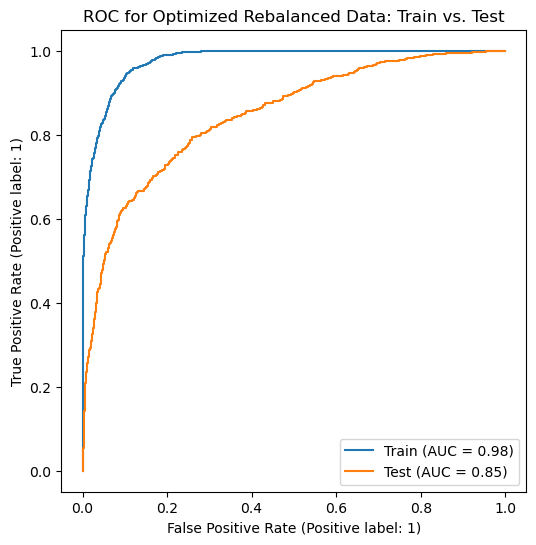

In [83]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC for Optimized Rebalanced Data: Train vs. Test")
RocCurveDisplay.from_estimator(best_rf_rb_hp, X_train, y_train,ax=plt.gca(), name="Train")
RocCurveDisplay.from_estimator(best_rf_rb_hp, X_test, y_test,ax=plt.gca(), name="Test")

In [84]:
logreg_og = LogisticRegression(max_iter=20000, random_state=1234)

In [85]:
logreg_og.fit(X_train, y_train)
y_pred_logreg_og = logreg_og.predict(X_test)

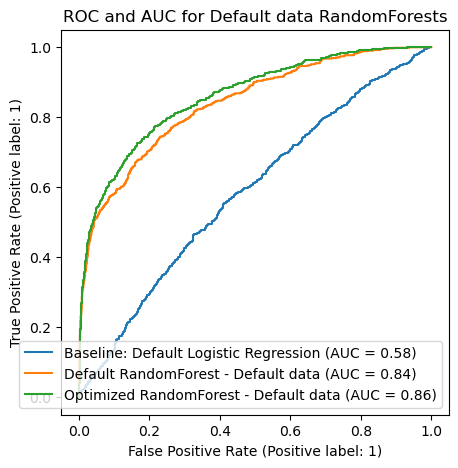

In [86]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("ROC and AUC for Default data RandomForests")
RocCurveDisplay.from_estimator(logreg_og, X_test, y_test, ax=ax, name= "Baseline: Default Logistic Regression")

RocCurveDisplay.from_estimator(rf_og, X_test, y_test,ax=ax, name="Default RandomForest - Default data")
RocCurveDisplay.from_estimator(best_rf_hp, X_test, y_test,ax=plt.gca(), name="Optimized RandomForest - Default data") 

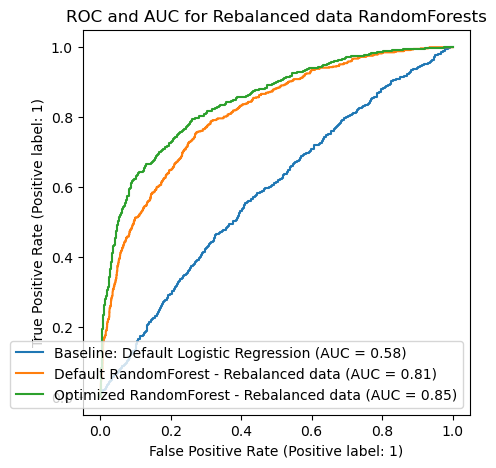

In [87]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("ROC and AUC for Rebalanced data RandomForests")

RocCurveDisplay.from_estimator(logreg_og, X_test, y_test, ax=ax, name= "Baseline: Default Logistic Regression")
RocCurveDisplay.from_estimator(rf_rb, X_test, y_test,ax=plt.gca(), name="Default RandomForest - Rebalanced data")
RocCurveDisplay.from_estimator(best_rf_rb_hp, X_test, y_test,ax=plt.gca(), name="Optimized RandomForest - Rebalanced data") 

In [88]:
print('\n\033[1m','Default RandomForest - Default data:')
print('\033[0m', classification_report(y_test, y_pred_rf_og))
print('\n\033[1m','Optimized RandomForest - Default data:')
print('\033[0m', classification_report(y_test, y_pred_rf_hp))

print('\n\033[1m','Default RandomForest - Rebalanced data:')
print('\033[0m', classification_report(y_test, y_pred_rf_rb))
print('\n\033[1m','Optimized RandomForest - Rebalanced data:')
print('\033[0m', classification_report(y_test, y_pred_rf_rb_hp))


 Default RandomForest - Default data:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2385
           1       0.90      0.29      0.44       615

    accuracy                           0.85      3000
   macro avg       0.87      0.64      0.68      3000
weighted avg       0.85      0.85      0.81      3000


 Optimized RandomForest - Default data:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2385
           1       0.82      0.43      0.57       615

    accuracy                           0.86      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.86      0.85      3000


 Default RandomForest - Rebalanced data:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2385
           1       0.48      0.62      0.54       615

    accuracy                           0.78      3000
   

In [89]:
prediction_results = {}

accuracy = accuracy_score(y_pred_rf_og,y_test)
precision = precision_score(y_pred_rf_og,y_test)
recall = recall_score(y_pred_rf_og,y_test)
roc = roc_auc_score(y_pred_rf_og,y_test)
f1 = f1_score(y_pred_rf_og,y_test)

prediction_results['Default Model - Default Data'] = [accuracy,precision,recall,roc,f1]
results_df = pd.DataFrame(data = prediction_results, index = ["Accuracy", "Precision", "Recall","ROC-AUC","F1"])
results_df


,Default Model - Default Data
Accuracy,0.847667
Precision,0.291057
Recall,0.895000
ROC-AUC,0.869643
F1,0.439264


In [90]:
## 4.3. Decision Tree

### 4.3.1 Decision Tree- Default data:

In [91]:
model_tree = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_leaf=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=1234)

Use the fitted model to predict the labels for the test set.

In [92]:
y_pred_tree = model_tree.predict(X_test)

In [93]:
y_pred_tree_prob = model_tree.predict_proba(X_test)[:, 1] 

In [94]:
y_pred_tree_prob

array([0.1625    , 0.1625    , 0.04379562, ..., 0.04379562, 0.04379562,
       0.1625    ])

In [95]:
accuracy_score(y_test, y_pred_tree)

0.837

In [96]:
column_names = X_train.columns

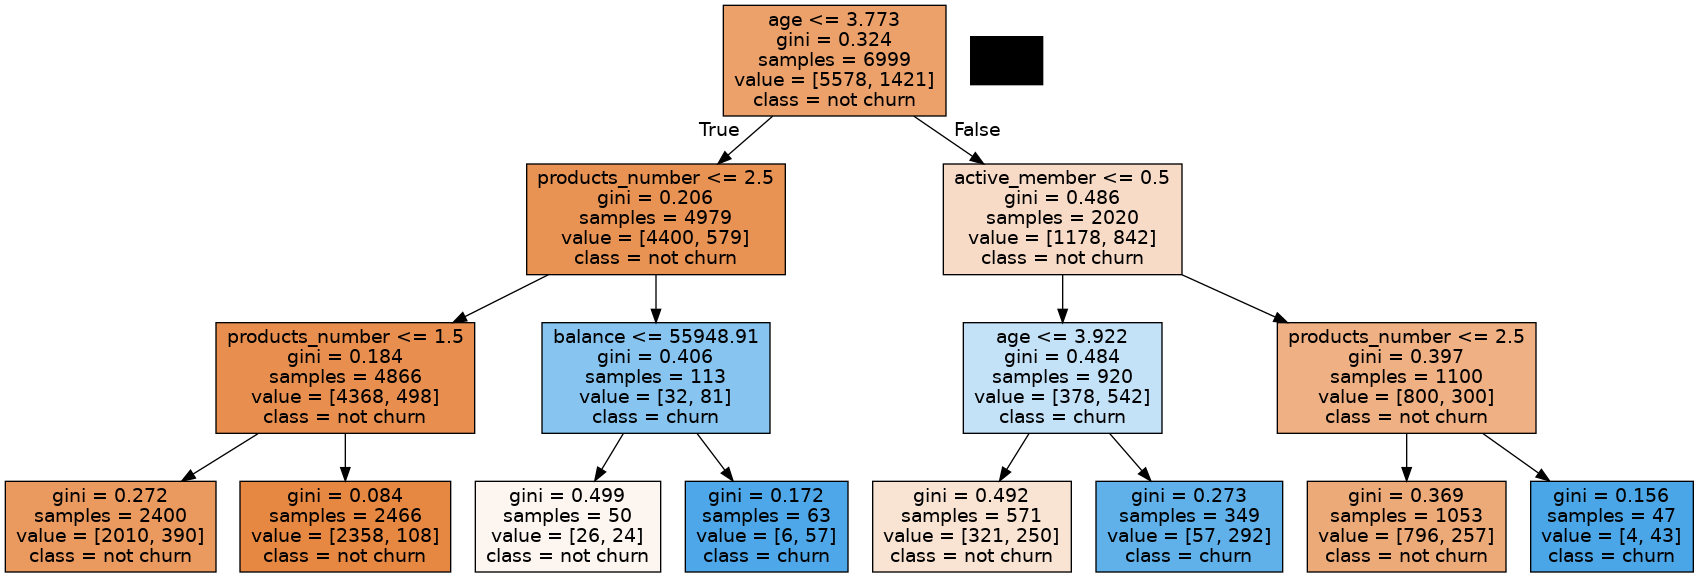

In [97]:
# Create DOT data
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=column_names, 
                                class_names=["not churn", "churn"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

#graph.write_png("tree.png") # uncomment to create PNG image into folder --> not gonna do that this time

# Show graph
Image(graph.create_png())

Text(0.5, 1.0, 'Decision tree (true values)')

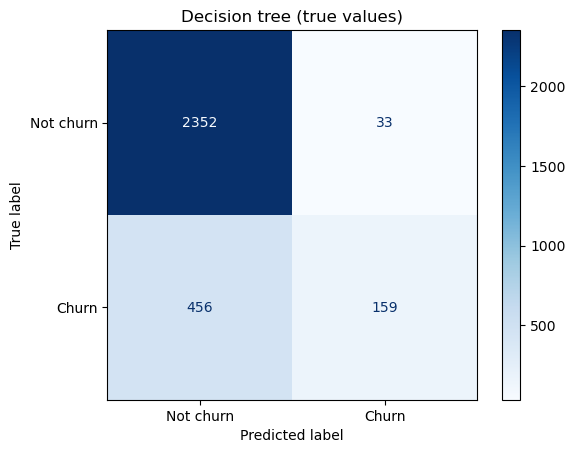

In [98]:
#Confusion matrix with true values 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", display_labels=["Not churn", "Churn"])
plt.title("Decision tree (true values)")

Text(0.5, 1.0, 'Decision tree (normalized)')

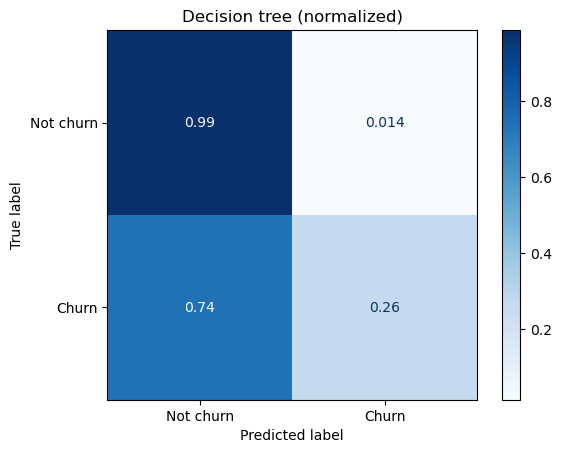

In [99]:
# Confusion matrix normalized
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", normalize="true", display_labels=["Not churn", "Churn"])
plt.title("Decision tree (normalized)")

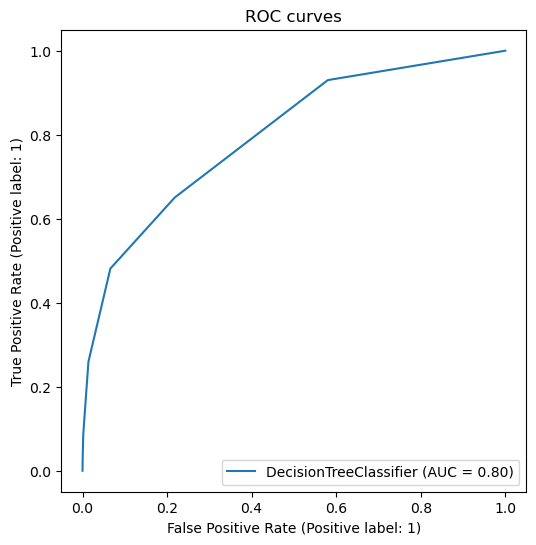

In [100]:
#ROC and AUC

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC curves")
RocCurveDisplay.from_estimator(model_tree, X_test, y_test,ax=ax)
# Haven't performed logreg yet, might do later 
# RocCurveDisplay.from_estimator(model_logreg, X_test, y_test,ax=ax) 

In [101]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

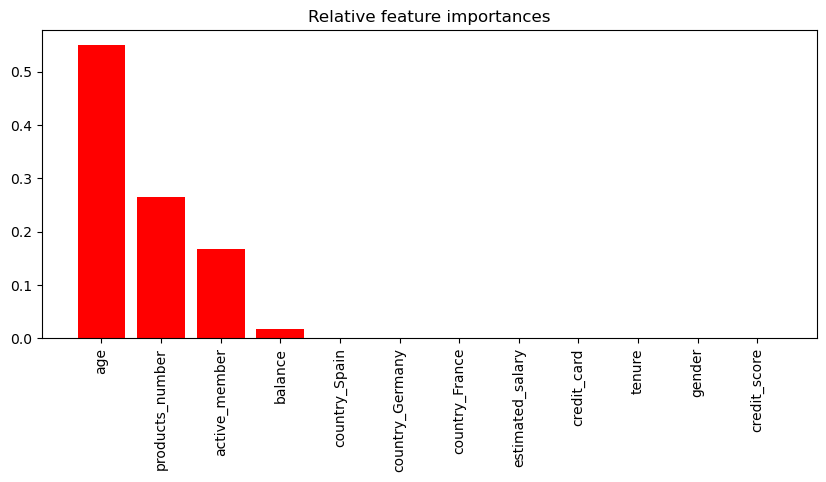

In [102]:
# Plot the feature importances 
plt.figure(figsize=(10, 4))
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [103]:
print(classification_report(y_test, y_pred_tree))  

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2385
           1       0.83      0.26      0.39       615

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.80      3000



Next, some hyperparameter tuning to see if it improves the metrics

In [112]:
# Hyperparameter tuning: Randomized search 

# You can include multiple grids. This is useful e.g. when different kernels need different hyperparameters.
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1)

In [113]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10]})

In [114]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_

print("Best score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best score: 0.8591227407331768
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 6}
Best Estimator: DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)


In [115]:
best_params ={
    'max_depth': 6,
    'min_samples_split': 5,
    'min_samples_leaf': 5,
}
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5)

In [116]:
y_pred = best_model.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8573333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2385
           1       0.77      0.43      0.56       615

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [118]:
# Accuracy before hyperparameter tuning 

y_pred0 = model_tree.predict(X_test)
accuracy_score(y_test, y_pred0)

0.837

In [119]:
# Accuracy after hyperparameter tuning with randomized search

y_pred_rs = random_search.predict(X_test)
accuracy_score(y_test, y_pred_rs)

0.8576666666666667

Accuracy slightly improved with hyperparameter tuning from 0.837 -> 0.857. 

Text(0.5, 1.0, 'Decision tree with default hyperparameters (normalized)')

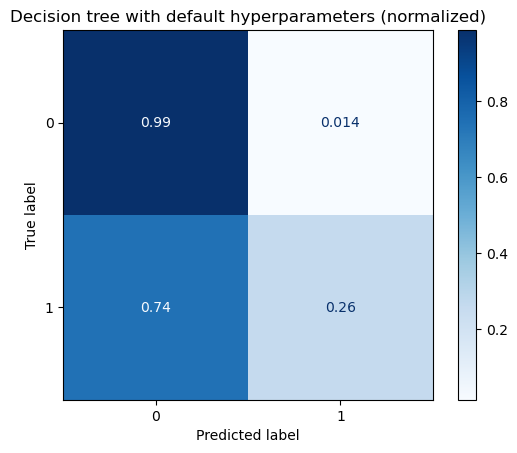

In [120]:
ConfusionMatrixDisplay.from_estimator(model_tree, X_test, y_test, cmap="Blues", normalize='true')
plt.title("Decision tree with default hyperparameters (normalized)")

Text(0.5, 1.0, 'Decision tree with optimized hyperparameters (normalized)')

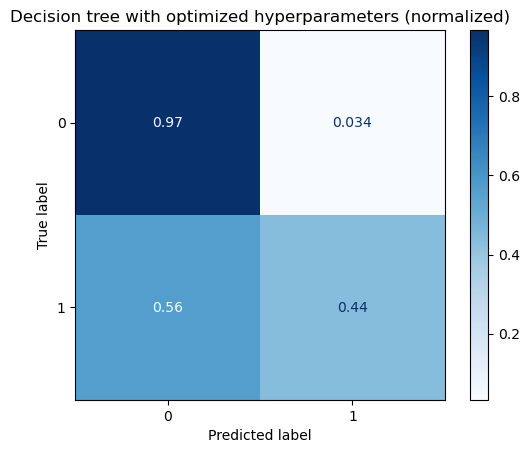

In [121]:
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test, cmap="Blues", normalize='true')
plt.title("Decision tree with optimized hyperparameters (normalized)")

Both models are good at predicting true negatives, which means customers predicted not to churn and they won't. Accuracy of predicting those that will churn improved with hyperparameter tuning from 26 % to 44 %, which means the result is better but not ideal.

Let's also look at ROC curves.

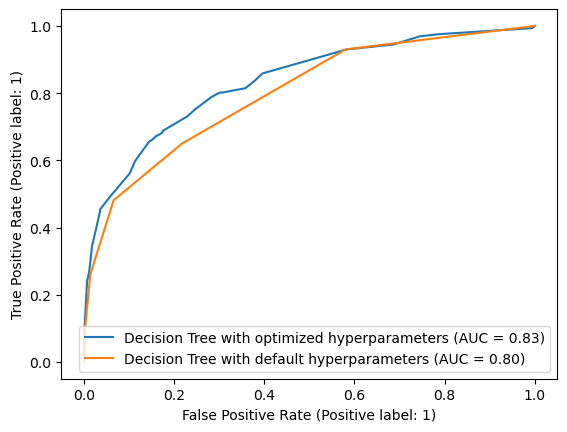

In [122]:
RocCurveDisplay.from_estimator(random_search, X_test, y_test, name="Decision Tree with optimized hyperparameters")
RocCurveDisplay.from_estimator(model_tree, X_test, y_test, name="Decision Tree with default hyperparameters", ax=plt.gca())

The ROC-curve is slightly better, therefore hyperparameter tuning improved the AUC slightly.

### 4.3.2 Decision Tree- rebalanced data 

In [123]:
model_tree1 = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_leaf=3)
model_tree1.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=1234)

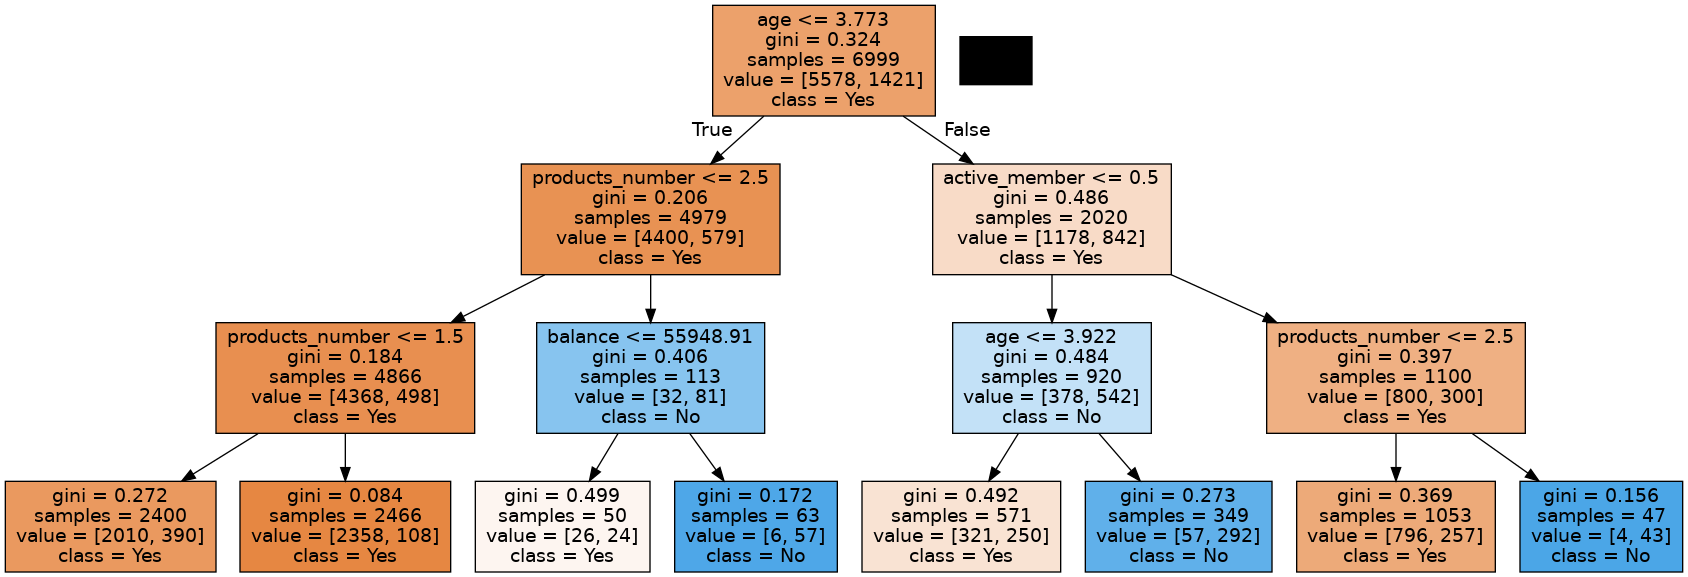

In [124]:
column_names = X_train.columns
# Create DOT data
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=column_names, 
                                class_names=["Yes", "No"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

#graph.write_png("tree.png") # uncomment to create PNG image into folder 

# Show graph
Image(graph.create_png())

In [125]:
importances = model_tree1.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

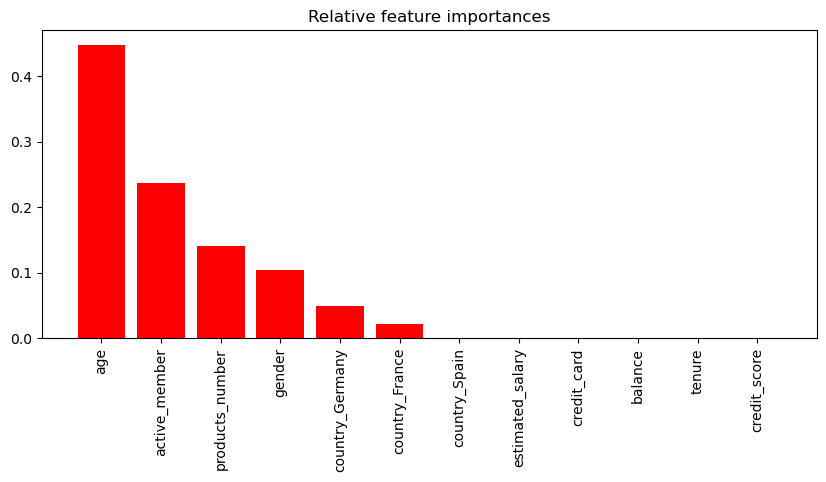

In [126]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(10, 4))
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [127]:
y_pred_1 = model_tree1.predict(X_test)
y_pred_probs_1 = model_tree1.predict_proba(X_test)

In [128]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_1)*100).round(2))
print ("roc is: ", (roc_auc_score(y_test,y_pred_1)*100).round(2))

Accuracy is:  76.63
roc is:  70.58


In [129]:
print(classification_report(y_test, y_pred_1))  

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2385
           1       0.45      0.60      0.51       615

    accuracy                           0.77      3000
   macro avg       0.67      0.71      0.68      3000
weighted avg       0.80      0.77      0.78      3000



### 4.4 SVM

### 4.4.1 Default

In [130]:
model_svm = SVC(probability = True, random_state = 123, kernel = 'rbf', C = 10, gamma = 0.1)
model_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True, random_state=123)

In [131]:
y_pred_svm = model_svm.predict(X_test)

Text(0.5, 1.0, 'Optimized RandomForest - Absolute values')

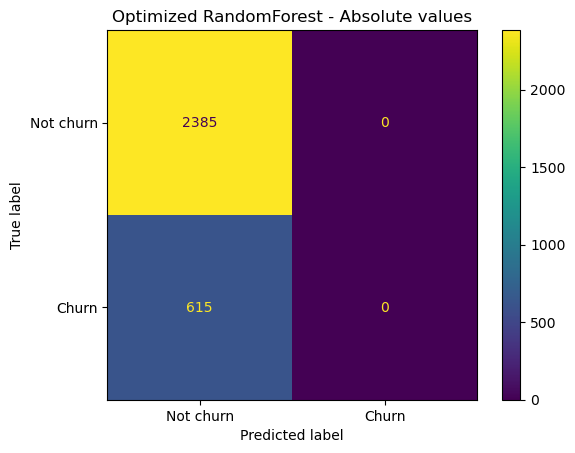

In [132]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not churn", "Churn"]).plot();
plt.title("Optimized RandomForest - Absolute values")

### 4.4.2 Rebalance

In [133]:
from sklearn.svm import SVC
model_svm_rebal = SVC(probability = True, random_state = 123, kernel = 'rbf', C = 10, gamma = 0.1)
model_svm_rebal.fit(X_sm, y_sm)

SVC(C=10, gamma=0.1, probability=True, random_state=123)

In [134]:
y_pred_svm_rebal = model_svm.predict(X_test)

Text(0.5, 1.0, 'Optimized RandomForest - Absolute values')

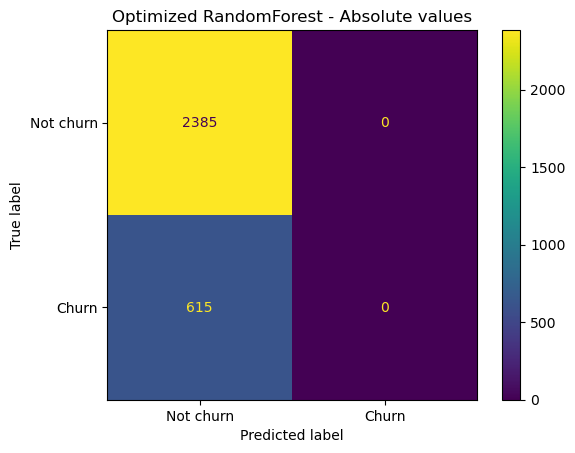

In [135]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_rebal)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not churn", "Churn"]).plot();
plt.title("Optimized RandomForest - Absolute values")

In [136]:
# print classification report 
print(classification_report(y_test, y_pred_svm_rebal)) 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2385
           1       0.00      0.00      0.00       615

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.70      3000



/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## StandardScaler

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [138]:
df_scaled = pd.DataFrame(X_standard)
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
mean,7.674629e-17,-3.837315e-17,1.893075e-15,8.669488e-17,-1.271999e-16,2.060780e-16,4.974297e-17,9.309041e-17,-1.030390e-16,-2.842455e-18,1.051708e-16,3.766253e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109345e+00,-1.095887e+00,-2.822405e+00,-1.733274e+00,-1.225746e+00,-9.116670e-01,-1.547658e+00,-1.030570e+00,-1.739254e+00,-1.002905e+00,-5.786206e-01,-5.738473e-01
25%,-6.882762e-01,-1.095887e+00,-6.285683e-01,-6.959863e-01,-1.225746e+00,-9.116670e-01,-1.547658e+00,-1.030570e+00,-8.536534e-01,-1.002905e+00,-5.786206e-01,-5.738473e-01
50%,1.528220e-02,9.125028e-01,-6.794331e-02,-4.460785e-03,3.318719e-01,-9.116670e-01,6.461375e-01,9.703367e-01,1.741707e-03,9.971039e-01,-5.786206e-01,-5.738473e-01
75%,6.981477e-01,9.125028e-01,6.039404e-01,6.870647e-01,8.200054e-01,8.076386e-01,6.461375e-01,9.703367e-01,8.572224e-01,9.971039e-01,1.728248e+00,-5.738473e-01
max,2.063879e+00,9.125028e-01,3.488704e+00,1.724353e+00,2.795335e+00,4.246250e+00,6.461375e-01,9.703367e-01,1.737202e+00,9.971039e-01,1.728248e+00,1.742624e+00


In [139]:
X_train_SS, X_test_SS, y_train_SS, y_test_SS = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [140]:
X_train_SS.shape, y_train_SS.shape

((6999, 12), (6999,))

In [141]:
svm_SS = SVC(kernel= 'rbf')
svm = svm_SS.fit(X_train_SS, y_train_SS)

In [142]:
y_pred_svm_SS = svm_SS.predict(X_test_SS) 
  
# print classification report 
print(classification_report(y_test, y_pred_svm_SS)) 


              precision    recall  f1-score   support

           0       0.80      0.90      0.84      2385
           1       0.22      0.11      0.15       615

    accuracy                           0.74      3000
   macro avg       0.51      0.50      0.50      3000
weighted avg       0.68      0.74      0.70      3000



/opt/software/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


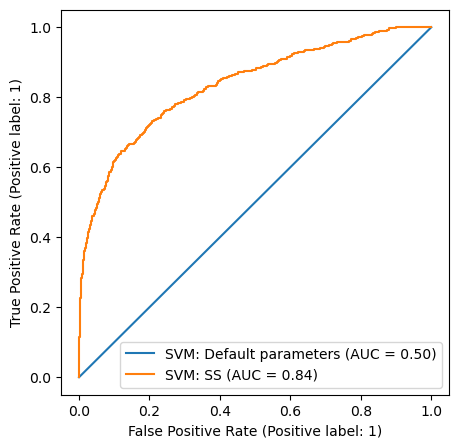

In [143]:
fig, ax = plt.subplots(figsize=(5, 5))
RocCurveDisplay.from_estimator(svm, X_test, y_test,ax=ax, name="SVM: Default parameters")
RocCurveDisplay.from_estimator(svm_SS, X_test_SS, y_test_SS,ax=ax, name="SVM: SS")


Hyperparameter Tunning

In [144]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
svm_params = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
             }
  
grid = GridSearchCV(SVC(), svm_params, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_SS, y_train_SS) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   2.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   2.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   2.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   2.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [145]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [146]:
best_params ={'C': 10,
'gamma': 0.01}
best_svm = SVC(**best_params)
best_svm.fit(X_train_SS, y_train_SS)

SVC(C=10, gamma=0.01)

In [147]:
y_pred_SS_tunning = best_svm.predict(X_test_SS) 
  
# print classification report 
print(classification_report(y_test_SS, y_pred_SS_tunning)) 


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2397
           1       0.84      0.39      0.53       603

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



Text(0.5, 1.0, 'Default SVM - Absolute values')

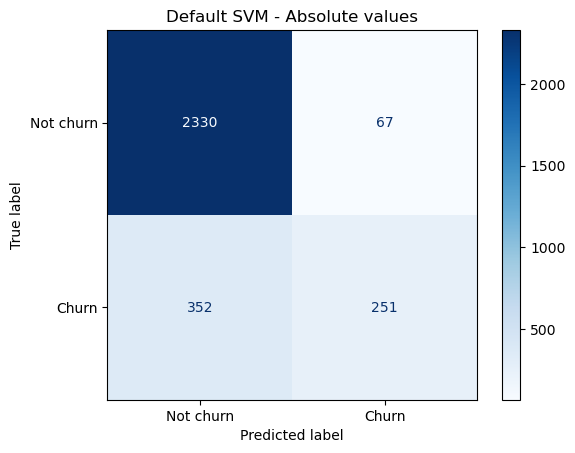

In [148]:
#Confusion matrix with true values 
ConfusionMatrixDisplay.from_predictions(y_test_SS, y_pred_svm_SS, cmap="Blues", display_labels=["Not churn", "Churn"])
plt.title("Default SVM - Absolute values")

Text(0.5, 1.0, 'SVM (relative)')

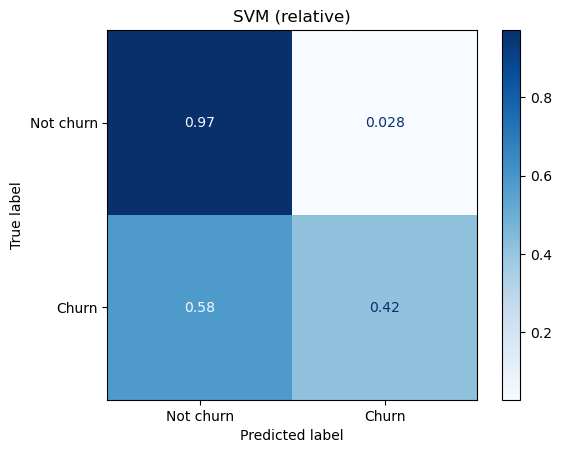

In [149]:
# Confusion matrix normalized
ConfusionMatrixDisplay.from_predictions(y_test_SS, y_pred_svm_SS, cmap="Blues", normalize="true", display_labels=["Not churn", "Churn"])
plt.title("SVM (relative)")

Text(0.5, 1.0, 'Optimization SVM - Absolute values')

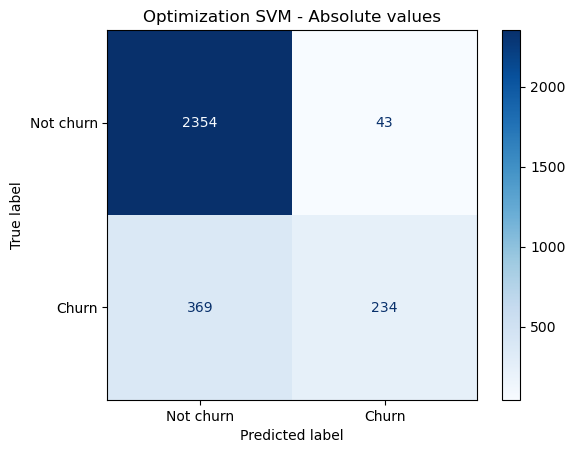

In [150]:
#Confusion matrix with true values 
ConfusionMatrixDisplay.from_predictions(y_test_SS, y_pred_SS_tunning, cmap="Blues", display_labels=["Not churn", "Churn"])
plt.title("Optimization SVM - Absolute values")

Text(0.5, 1.0, 'SVM (relative)')

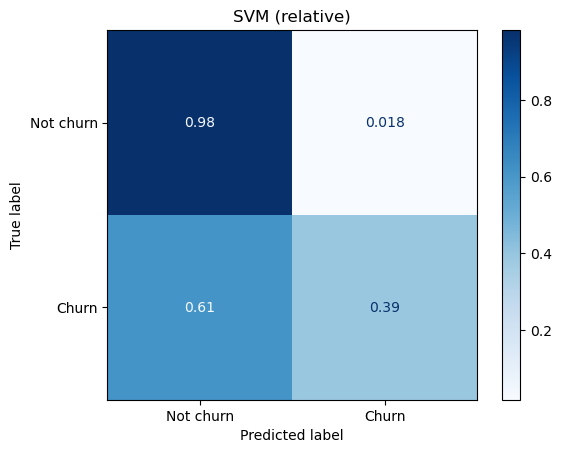

In [151]:
# Confusion matrix normalized
ConfusionMatrixDisplay.from_predictions(y_test_SS, y_pred_SS_tunning, cmap="Blues", normalize="true", display_labels=["Not churn", "Churn"])
plt.title("SVM (relative)")

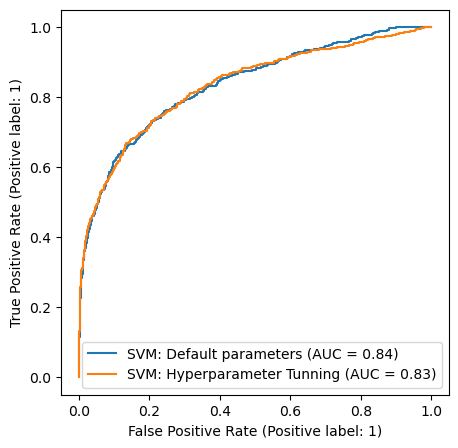

In [152]:
fig, ax = plt.subplots(figsize=(5, 5))
RocCurveDisplay.from_estimator(svm_SS, X_test_SS, y_test_SS,ax=ax, name="SVM: Default parameters")
RocCurveDisplay.from_estimator(best_svm, X_test_SS, y_test_SS,ax=ax, name="SVM: Hyperparameter Tunning")
